<a href="https://colab.research.google.com/github/nav0203/Machine-Learning-and-Text-Mining---Project/blob/main/Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MACHINE LEARNING (EXTENDED PROJECT)**




# **Part 1**

Part 1: Machine Learning Models You work for an office transport company. You are in discussions with ABC Consulting company for providing transport for their employees. For this purpose, you are tasked with understanding how do the employees of ABC Consulting prefer to commute presently (between home and office). Based on the parameters like age, salary, work experience etc. given in the data set ‘Transport.csv’, you are required to predict the preferred mode of transport. The project requires you to build several Machine Learning models and compare them so that the model can be finalised.

Data Dictionary Age : Age of the Employee in Years

Gender : Gender of the Employee

Engineer : For Engineer =1 , Non Engineer =0
  
MBA : For MBA =1 , Non MBA =0
  
Work Exp : Experience in years
  
Salary : Salary in Lakhs per Annum
   
Distance : Distance in Kms from Home to Office
   
license : If Employee has Driving Licence -1, If not, then 0
    
Transport : Mode of Transport

The objective is to build various Machine Learning models on this data set and based on the accuracy metrics decide which model is to be finalised for finally predicting the mode of transport chosen by the employee.

## **Questions: 1. Basic data summary, Univariate, Bivariate analysis, graphs, checking correlations, outliers and missing values treatment (if necessary) and check the basic descriptive statistics of the dataset**

Importing the necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

Importing the Dataset

Mounting Google Drive in Collab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Store the csv file path in a variable
path = "/content/drive/My Drive/Cars.csv"

In [ ]:
df=pd.read_csv(path)

##**Basic Data summary**

In [ ]:
print(df)

     Age  Gender  Engineer  MBA  Work Exp  Salary  Distance  license  \
0     28    Male         0    0         4    14.3       3.2        0   
1     23  Female         1    0         4     8.3       3.3        0   
2     29    Male         1    0         7    13.4       4.1        0   
3     28  Female         1    1         5    13.4       4.5        0   
4     27    Male         1    0         4    13.4       4.6        0   
..   ...     ...       ...  ...       ...     ...       ...      ...   
439   40    Male         1    0        20    57.0      21.4        1   
440   38    Male         1    0        19    44.0      21.5        1   
441   37    Male         1    0        19    45.0      21.5        1   
442   37    Male         0    0        19    47.0      22.8        1   
443   39    Male         1    1        21    50.0      23.4        1   

             Transport  
0     Public Transport  
1     Public Transport  
2     Public Transport  
3     Public Transport  
4     Publ

Basic Data Summary

In [ ]:
df.describe()

,Age,Engineer,MBA,Work Exp,Salary,Distance,license
count,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000
mean,27.747748,0.754505,0.252252,6.299550,16.238739,11.323198,0.234234
std,4.416710,0.430866,0.434795,5.112098,10.453851,3.606149,0.423997
min,18.000000,0.000000,0.000000,0.000000,6.500000,3.200000,0.000000
25%,25.000000,1.000000,0.000000,3.000000,9.800000,8.800000,0.000000
50%,27.000000,1.000000,0.000000,5.000000,13.600000,11.000000,0.000000
75%,30.000000,1.000000,1.000000,8.000000,15.725000,13.425000,0.000000
max,43.000000,1.000000,1.000000,24.000000,57.000000,23.400000,1.000000


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,444.0,27.747748,4.416710,18.0,25.0,27.0,30.000,43.0
Engineer,444.0,0.754505,0.430866,0.0,1.0,1.0,1.000,1.0
MBA,444.0,0.252252,0.434795,0.0,0.0,0.0,1.000,1.0
Work Exp,444.0,6.299550,5.112098,0.0,3.0,5.0,8.000,24.0
Salary,444.0,16.238739,10.453851,6.5,9.8,13.6,15.725,57.0
Distance,444.0,11.323198,3.606149,3.2,8.8,11.0,13.425,23.4
license,444.0,0.234234,0.423997,0.0,0.0,0.0,0.000,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        444 non-null    int64  
 1   Gender     444 non-null    object 
 2   Engineer   444 non-null    int64  
 3   MBA        444 non-null    int64  
 4   Work Exp   444 non-null    int64  
 5   Salary     444 non-null    float64
 6   Distance   444 non-null    float64
 7   license    444 non-null    int64  
 8   Transport  444 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 31.3+ KB


## **Univarate analysis on numeric data**

Univariate data refers to a kind of data in which every data point corresponds to a single variable. In other words, it involves the dimension or observation of a single specific or trait for each individual or item in the dataset. It doesn't explore connections between variables or attempt to identify causes. We'll do Descriptive Statistics and Visualizations in Univariate Analysis. Descriptive statistics, such as measures of central tendency (mean, median, mode) and measures of dispersion (range, standard deviation), are commonly used in the analysis of univariate data.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,444.0,27.747748,4.416710,18.0,25.0,27.0,30.000,43.0
Engineer,444.0,0.754505,0.430866,0.0,1.0,1.0,1.000,1.0
MBA,444.0,0.252252,0.434795,0.0,0.0,0.0,1.000,1.0
Work Exp,444.0,6.299550,5.112098,0.0,3.0,5.0,8.000,24.0
Salary,444.0,16.238739,10.453851,6.5,9.8,13.6,15.725,57.0
Distance,444.0,11.323198,3.606149,3.2,8.8,11.0,13.425,23.4
license,444.0,0.234234,0.423997,0.0,0.0,0.0,0.000,1.0


Before Starting Univariate analysis we will seperate the df on the basis of numerical and cateogrical data for easy processing of univariate and multi variate analysis.

First we have found the number of numerical and cateogrical data seperately

In [ ]:
numeric_data = df.select_dtypes(include=[np.number])
numeric_data.shape[1]

7

Printing Numerical data

In [ ]:
print(numeric_data)


     Age  Engineer  MBA  Work Exp  Salary  Distance  license
0     28         0    0         4    14.3       3.2        0
1     23         1    0         4     8.3       3.3        0
2     29         1    0         7    13.4       4.1        0
3     28         1    1         5    13.4       4.5        0
4     27         1    0         4    13.4       4.6        0
..   ...       ...  ...       ...     ...       ...      ...
439   40         1    0        20    57.0      21.4        1
440   38         1    0        19    44.0      21.5        1
441   37         1    0        19    45.0      21.5        1
442   37         0    0        19    47.0      22.8        1
443   39         1    1        21    50.0      23.4        1

[444 rows x 7 columns]


In [ ]:
categorical_data = df.select_dtypes(exclude=[np.number])
categorical_data.shape[1]

2

In [ ]:
print(categorical_data)

     Gender          Transport
0      Male   Public Transport
1    Female   Public Transport
2      Male   Public Transport
3    Female   Public Transport
4      Male   Public Transport
..      ...                ...
439    Male  Private Transport
440    Male  Private Transport
441    Male  Private Transport
442    Male  Private Transport
443    Male  Private Transport

[444 rows x 2 columns]


Now we can do univariate analysis
univarate analysis on numeric data

### 1.Histograms

This is a very common plot to show the nature of the distributions of individual variables. We have used a Kernal Density Plot (KDE) that is laid on the histogram to show the direction and shape of the distribution.

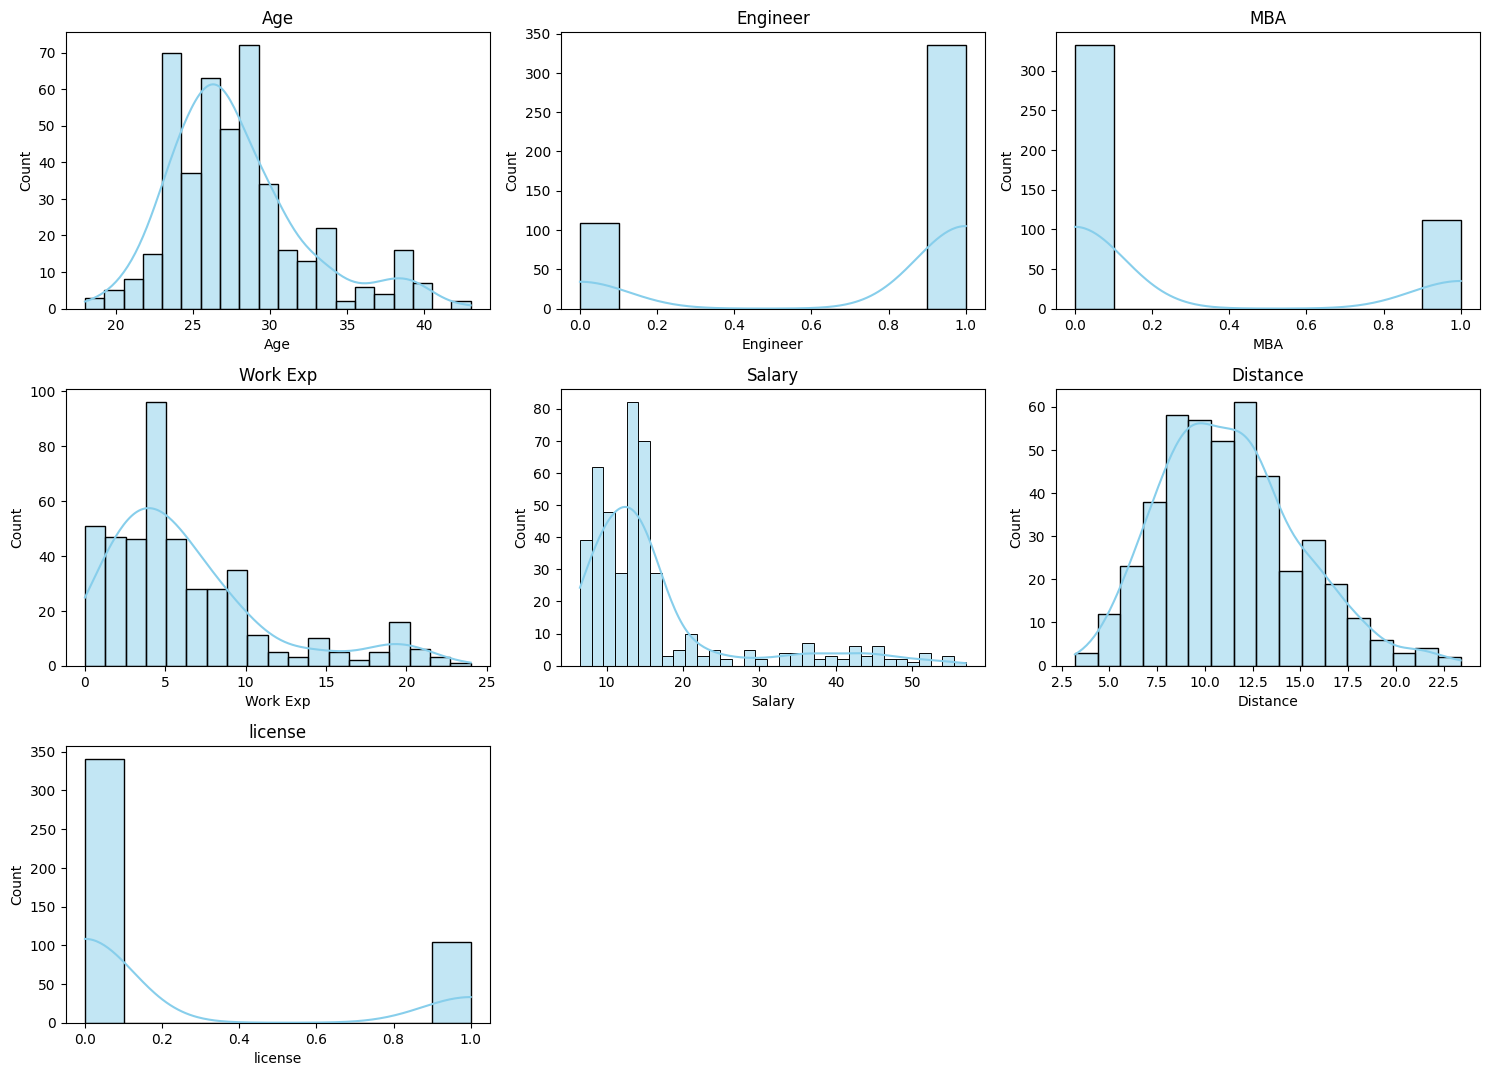

In [ ]:
## Creating histograms of all the columns to capture the distribution of each variable
plt.figure(figsize=(15, 14))
for i, col in enumerate(numeric_data.columns):
    plt.subplot(4, 3, i+1)
    sns.histplot(numeric_data[col], color='skyblue', kde = True)
    plt.title(col)
plt.tight_layout();

### **2.Boxplots**

The shape of the boxplot shows how the data is distributed and it also shows any outliers. The box shows the Inter Quartile Range, the box starts with Q1 and goes up till Q3. The line in the centre is median.

Outliers: Outliers refers to those observations that are beyond a certain range of the observations. We can find out whether a column has outliers or not by looking at the maximum and minimum value of the distribution and if it is beyond the defined range.

Upper Fence: IQR * 1.5 + Q3 Lower Fence: Q1 - IQR * 1.5

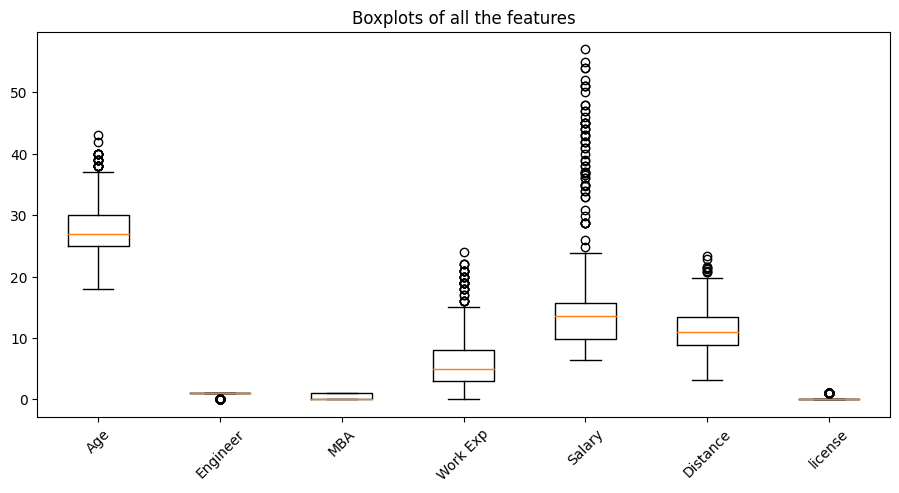

In [ ]:
## Boxplots of individual variables
plt.figure(figsize = (11,5))
plt.boxplot(numeric_data.values, labels = numeric_data.columns)
plt.title('Boxplots of all the features')
plt.xticks(rotation=45);

### **3.Normal Probability plot or Normal Quantile-Quantile (Q-Q) plot**

The normal probability plot is a graphical method for assessing whether or not a data set is roughly normally distributed. The data are colluded against a theoretical normal distribution in such a way that the points should form an approximate straight line. diversions from a straight line suggest departures from normalcy. The plots below show different Q-Q plots corresponding to the shape of their distributions shown by their respective histograms. The straight line in q-q plot represents normal distribution.

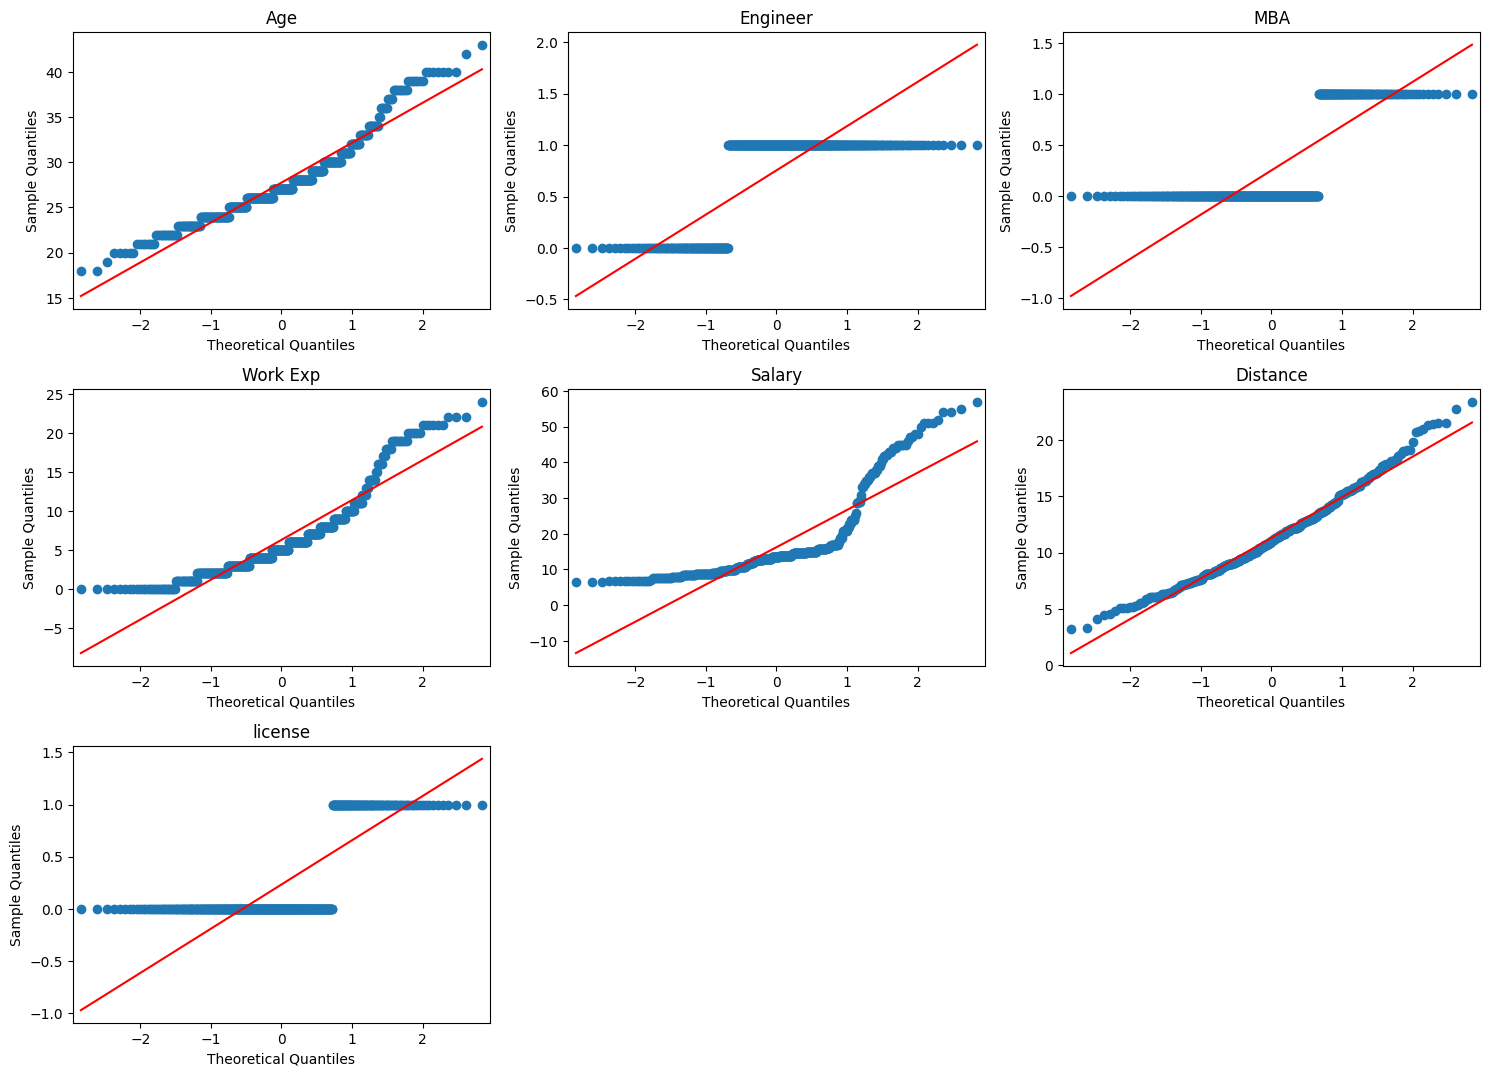

In [ ]:
## Q-Q plots
from statsmodels.api import qqplot
plt.figure(figsize=(15, 14))
for i, col in enumerate(numeric_data.columns):
    plt.subplot(4, 3, i+1)
    qqplot(numeric_data[col], line='s',ax=plt.gca())
    plt.title(col)
plt.tight_layout();

In the above plots, the points roughly approximate the normal distribution line, indicating that all the variables in this dataset are roughly normally distributed.

##**Univariate analysis on cateogrical data**

In [ ]:
print(categorical_data)

     Gender          Transport
0      Male   Public Transport
1    Female   Public Transport
2      Male   Public Transport
3    Female   Public Transport
4      Male   Public Transport
..      ...                ...
439    Male  Private Transport
440    Male  Private Transport
441    Male  Private Transport
442    Male  Private Transport
443    Male  Private Transport

[444 rows x 2 columns]


### **1.Frequency table**

Frequency table and Pie Chart of Gender

In [ ]:
# import packages
import pandas as pd
import numpy as np


# one way frequency table for the species column.
freq_table = pd.crosstab(df['Gender'], 'no_of_people')

freq_table


col_0,no_of_people
Gender,
Female,128
Male,316


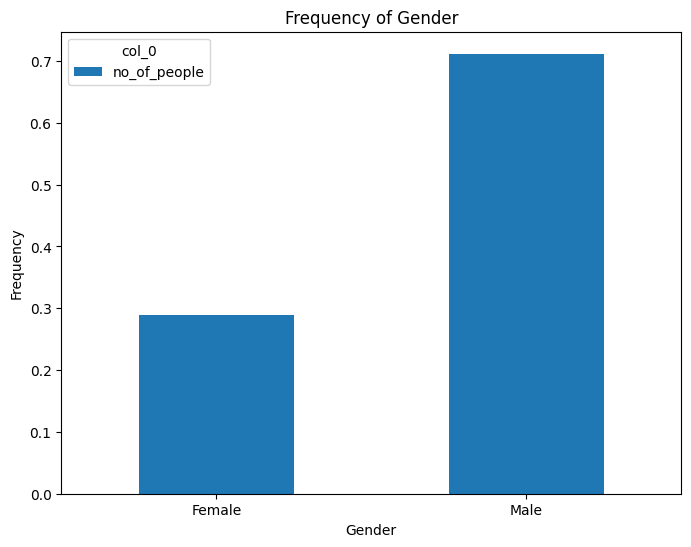

In [ ]:
import matplotlib.pyplot as plt

# Plot the frequency table as a bar chart
freq_table.plot(kind='bar', figsize=(8, 6))
plt.title('Frequency of Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

In [ ]:
#per frequency
freq_table_perc= freq_table/len(df)

freq_table_perc*100

col_0,no_of_people
Gender,
Female,28.828829
Male,71.171171


###**2.Piechart**

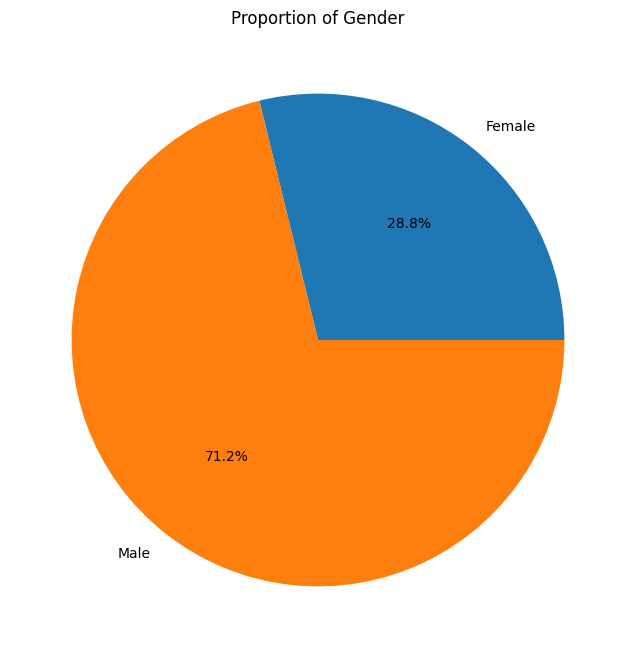

In [ ]:
import matplotlib.pyplot as plt

# Plot pie chart of proportion frequency table
freq_table_perc.plot.pie(y='no_of_people', autopct='%1.1f%%', figsize=(8, 8), legend=False)
plt.title('Proportion of Gender')
plt.ylabel('')  # Remove y-label
plt.show()

Frequency table and pie chart of Transport column

In [ ]:
# import packages
import pandas as pd
import numpy as np


# one way frequency table for the species column.
freq_table2 = pd.crosstab(df['Transport'], 'no_of_people')

freq_table2


col_0,no_of_people
Transport,
Private Transport,144
Public Transport,300


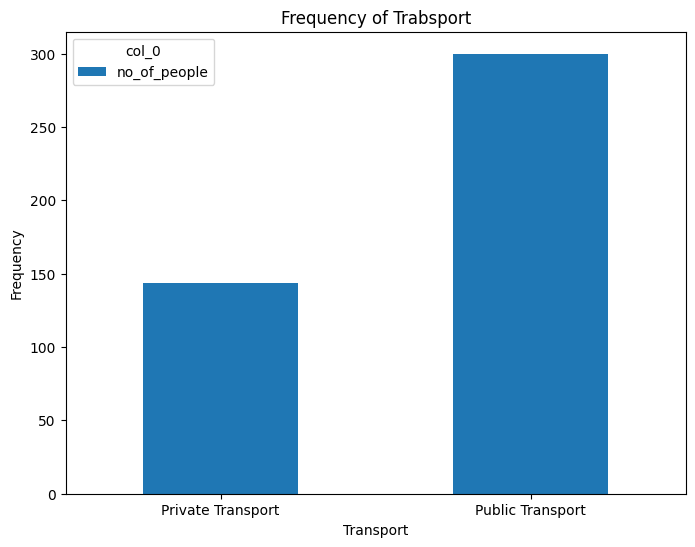

In [ ]:
import matplotlib.pyplot as plt

# Plot the frequency table as a bar chart
freq_table2.plot(kind='bar', figsize=(8, 6))
plt.title('Frequency of Trabsport')
plt.xlabel('Transport')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

In [ ]:
# frequency table in proportion of Transport
freq_table_perc2= freq_table2/len(df)

freq_table_perc2*100

col_0,no_of_people
Transport,
Private Transport,32.432432
Public Transport,67.567568


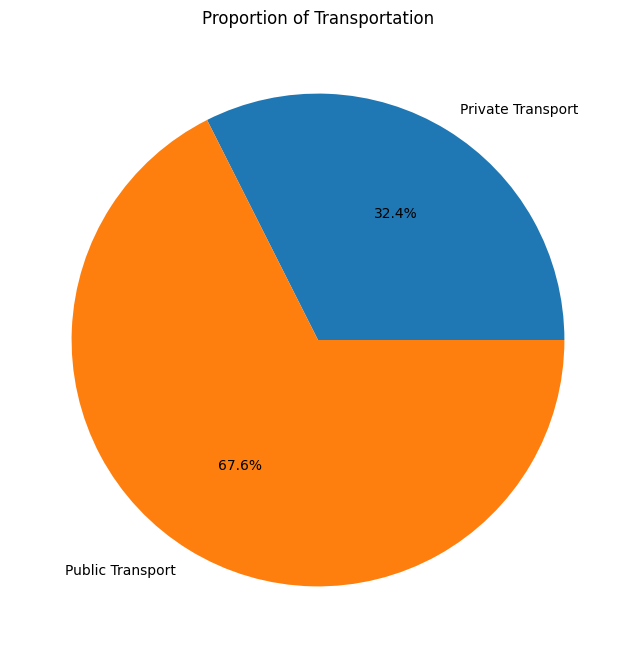

In [ ]:
import matplotlib.pyplot as plt

# Plot pie chart of proportion frequency table
freq_table_perc2.plot.pie(y='no_of_people', autopct='%1.1f%%', figsize=(8, 8), legend=False)
plt.title('Proportion of Transportation')
plt.ylabel('')  # Remove y-label
plt.show()

## **Bivariate analysis on Categorical and Categorical variable**

caegorical and cateogrical variable (gender and transport )

### **1.Frequency Table**

In [ ]:
# import packages
import pandas as pd
import numpy as np
# two way frequency table for the ship mode column
# and consumer column of the superstore dataset.
freq_table3 = pd.crosstab(categorical_data['Gender'], categorical_data['Transport'])

freq_table3

Transport,Private Transport,Public Transport
Gender,,
Female,51,77
Male,93,223


### **2.Bar Chart**

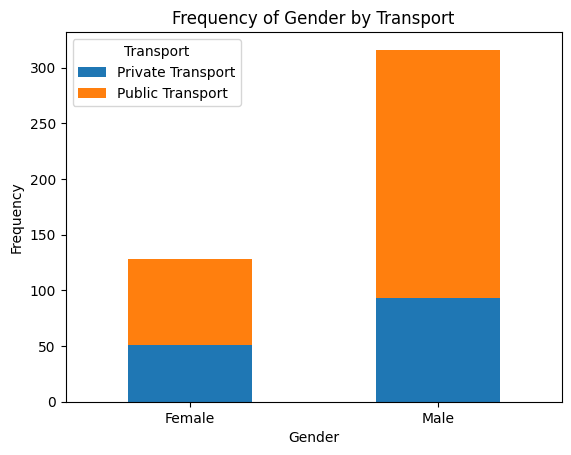

In [ ]:
import matplotlib.pyplot as plt

# Plot the frequency table
freq_table3.plot(kind='bar', stacked=True)
plt.title('Frequency of Gender by Transport')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.legend(title='Transport')
plt.show()

In [ ]:

# Calculate the sum of each column
column_sums = freq_table3.sum()

# Divide each cell by the sum of its respective column and multiply by 100
percentage_freq_table3 = (freq_table3 / column_sums) * 100

print(percentage_freq_table3)

Transport  Private Transport  Public Transport
Gender                                        
Female             35.416667         25.666667
Male               64.583333         74.333333


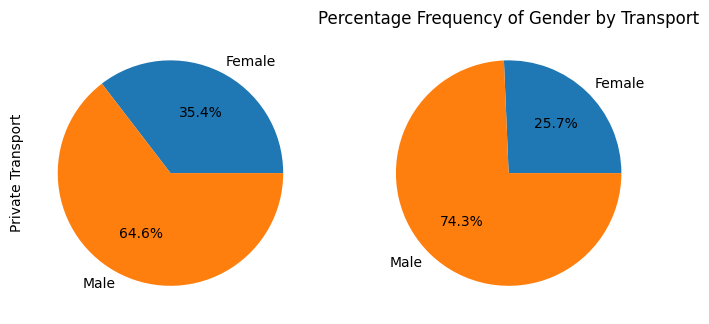

In [ ]:
import matplotlib.pyplot as plt

# Plot pie chart of percentage frequency table
percentage_freq_table3.plot.pie(subplots=True, figsize=(8, 4), autopct='%1.1f%%', legend=False)
plt.title('Percentage Frequency of Gender by Transport')
plt.ylabel('')  # Remove y-label
plt.show()

## **Bivariate analysis when one variable is cateogrical and other is numerical**

### **1.Box Plot**

1.Between Gender and Engineer

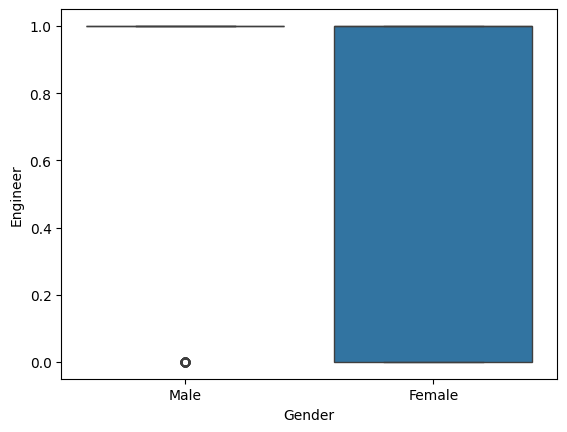

In [ ]:
sns.boxplot(x='Gender',y='Engineer',data=df)
plt.show()

2.Between Gender and Salary

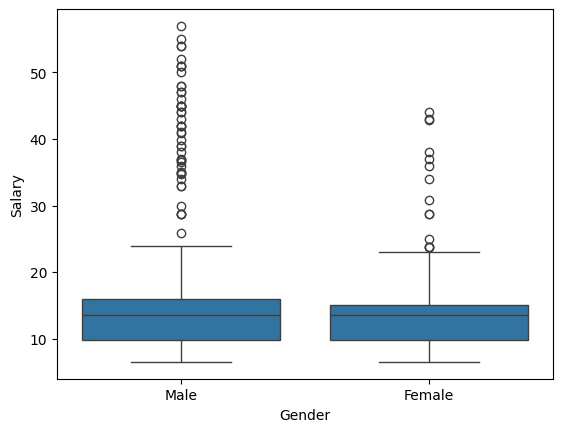

In [ ]:
sns.boxplot(x='Gender',y='Salary',data=df)
plt.show()

3.Between Gender and MBA

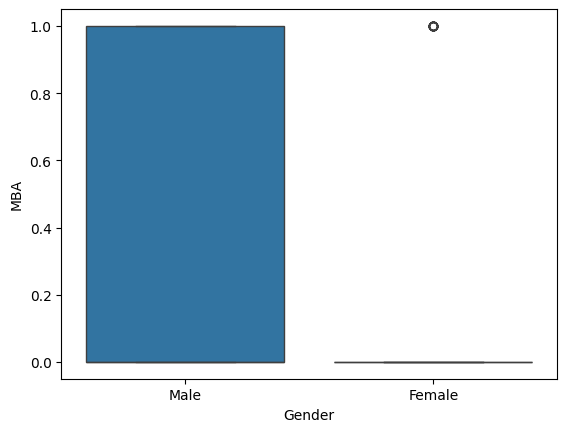

In [ ]:
sns.boxplot(x='Gender',y='MBA',data=df)
plt.show()

4.Between Gender and Work Exp

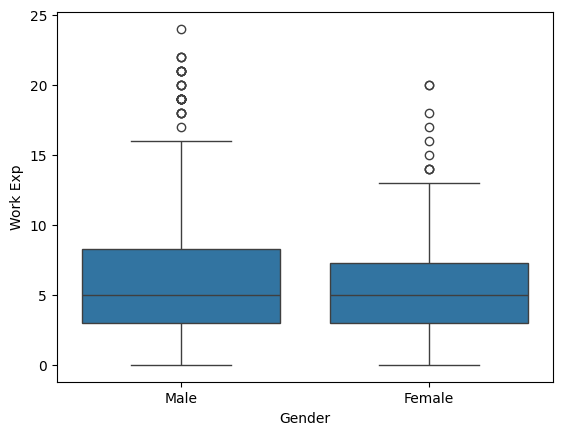

In [ ]:
sns.boxplot(x='Gender',y='Work Exp',data=df)
plt.show()

5.Between Gender and Distance

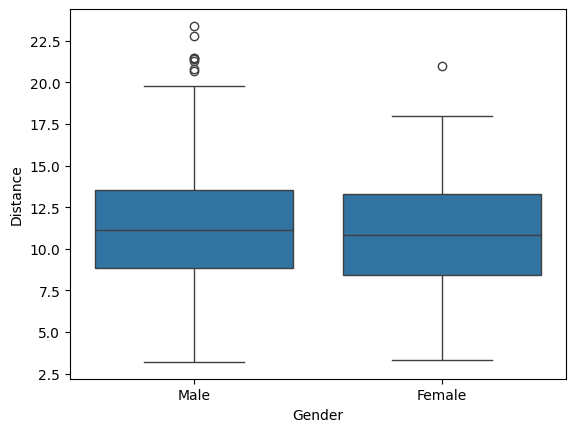

In [ ]:
sns.boxplot(x='Gender',y='Distance',data=df)
plt.show()

6.Between Transport and Distance

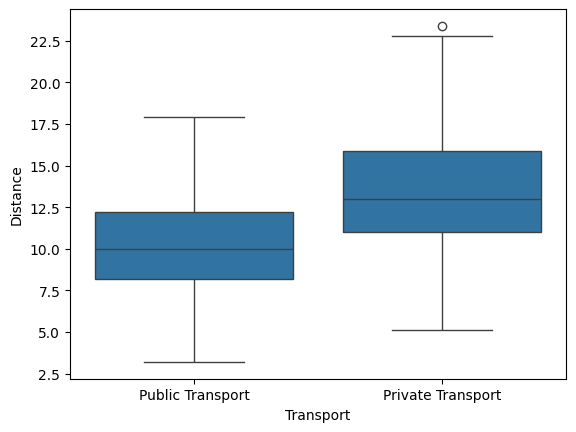

In [ ]:
sns.boxplot(x='Transport',y='Distance',data=df)
plt.show()

7.Between Transport and Salary

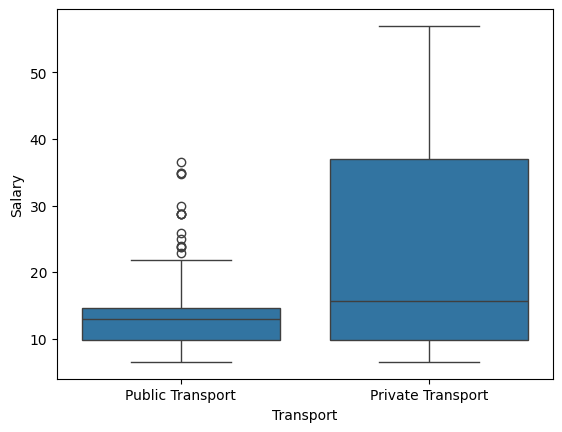

In [ ]:
sns.boxplot(x='Transport',y='Salary',data=df)
plt.show()

### **2.Bar Graph**

1.Between Salary and Transport

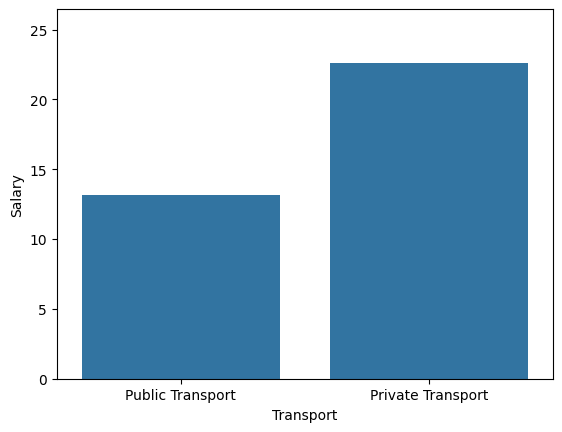

In [ ]:
sns.barplot(x='Transport',y='Salary',data=df,errwidth=0)
plt.show()

1.Between Transport and Distance

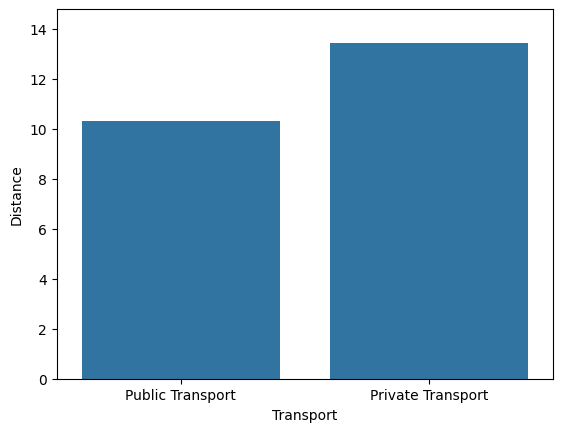

In [ ]:
sns.barplot(x='Transport',y='Distance',data=df,errwidth=0)
plt.show()

3.Between Transport and Engineer

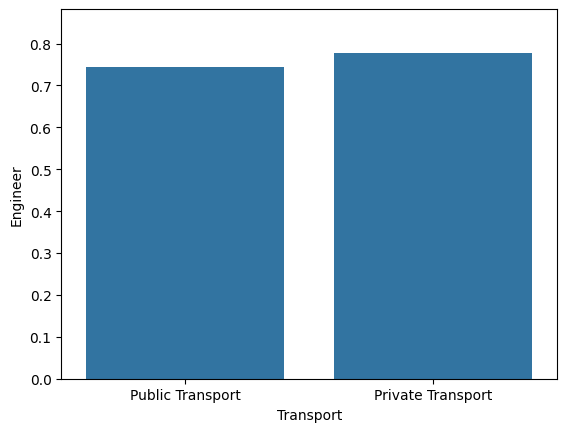

In [ ]:
sns.barplot(x='Transport',y='Engineer',data=df,errwidth=0)
plt.show()

4.Between Transport and MBA

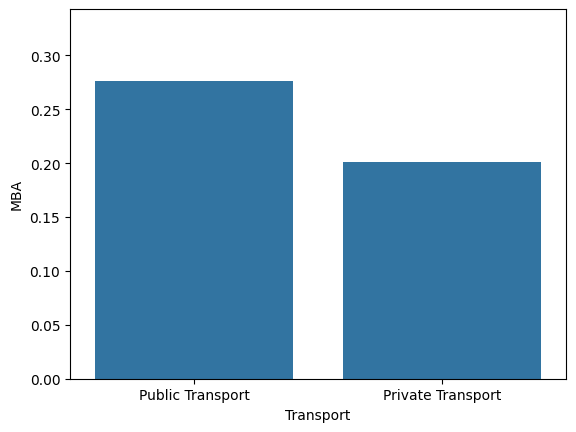

In [ ]:
sns.barplot(x='Transport',y='MBA',data=df,errwidth=0)
plt.show()

5.Between Gender and MBA

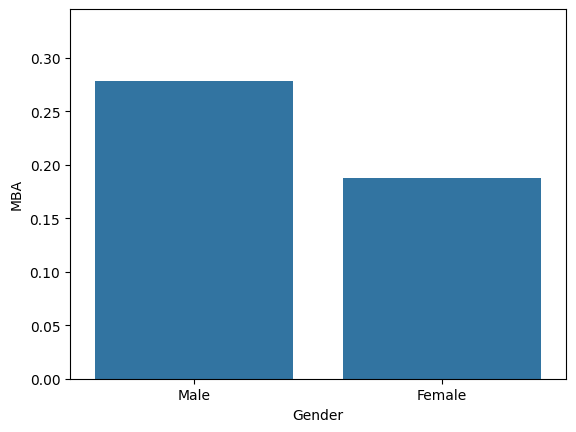

In [ ]:
sns.barplot(x='Gender',y='MBA',data=df,errwidth=0)
plt.show()

6.Between Gender and Salary

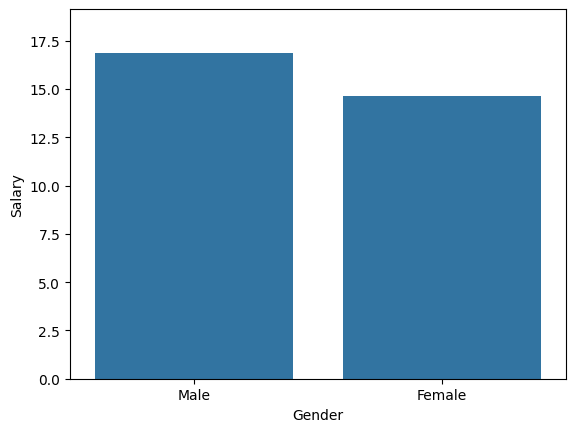

In [ ]:
sns.barplot(x='Gender',y='Salary',data=df,errwidth=0)
plt.show()

### **3.Scatter Plot**

1.Between Gender and Salary

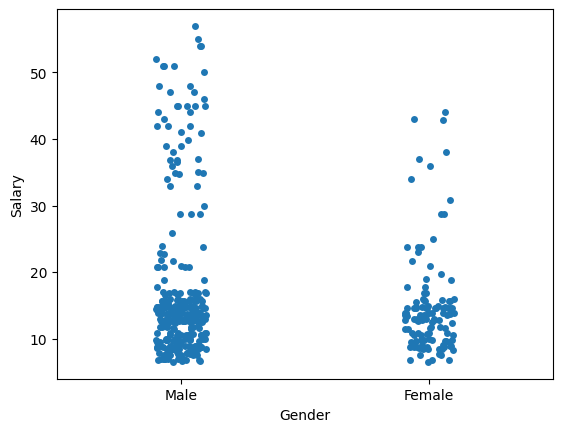

In [ ]:
sns.stripplot(x='Gender',y='Salary',data=df)
plt.show()

2.Between Gender and Distance

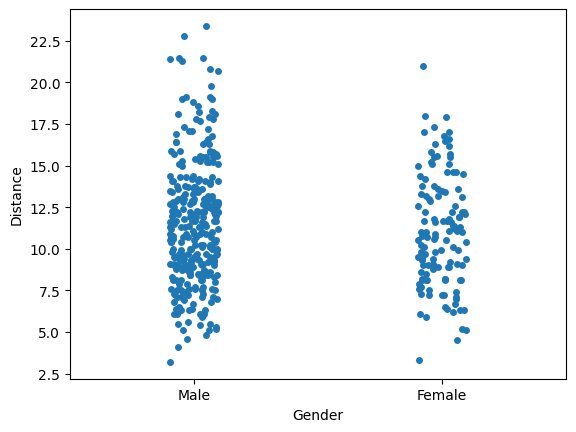

In [ ]:
sns.stripplot(x='Gender',y='Distance',data=df)
plt.show()

3.Between Gender and MBA

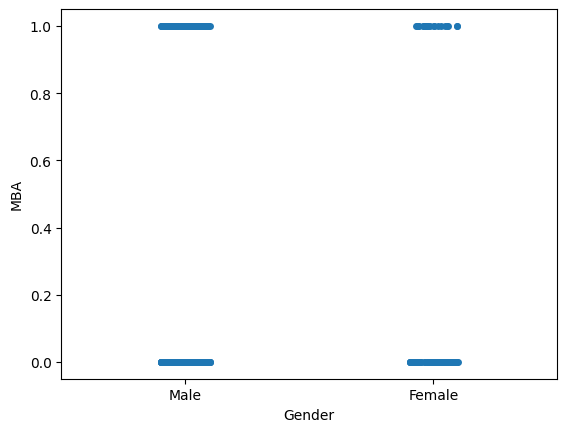

In [ ]:
sns.stripplot(x='Gender',y='MBA',data=df)
plt.show()

4.Between Gender and Work Exp

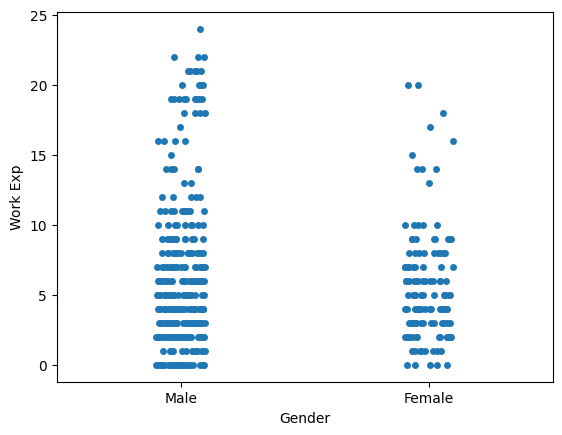

In [ ]:
sns.stripplot(x='Gender',y='Work Exp',data=df)
plt.show()

5.Between Transport and Work Exp

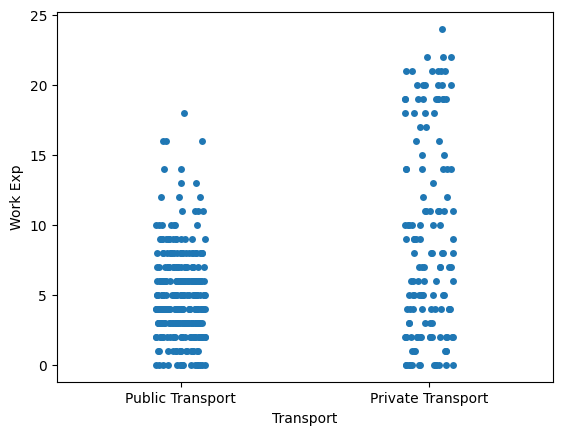

In [ ]:
sns.stripplot(x='Transport',y='Work Exp',data=df)
plt.show()

6.Between Transport and Salary

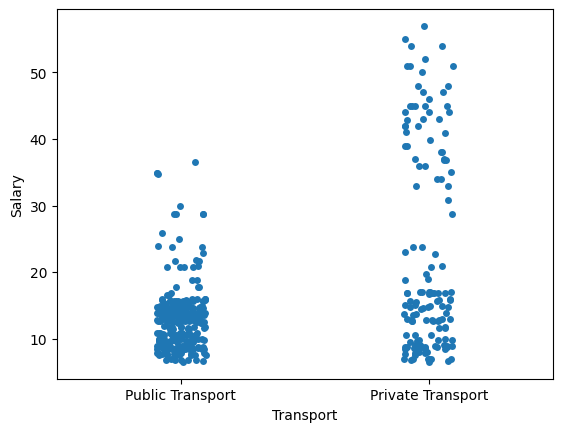

In [ ]:
sns.stripplot(x='Transport',y='Salary',data=df)
plt.show()

7.Between Transport and Distance

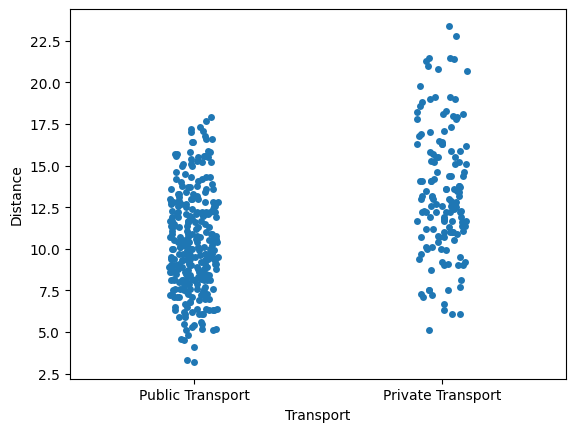

In [ ]:
sns.stripplot(x='Transport',y='Distance',data=df)
plt.show()

##**Bivariate analysis when both data are numerical**

## **1.Scatter plot**

Between Salary and Distance

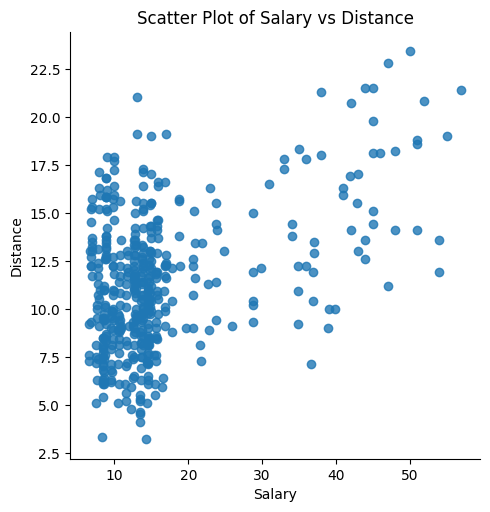

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot lmplot with custom color
sns.lmplot(x='Salary', y='Distance', fit_reg=False, data=df)
plt.title('Scatter Plot of Salary vs Distance')
plt.xlabel('Salary')
plt.ylabel('Distance')
plt.show()


## **2.Correlation**

In [ ]:
numeric_data.corr()

,Age,Engineer,MBA,Work Exp,Salary,Distance,license
Age,1.000000,0.091935,-0.029090,0.932236,0.860673,0.352872,0.452311
Engineer,0.091935,1.000000,0.066218,0.085729,0.086762,0.059316,0.018924
MBA,-0.029090,0.066218,1.000000,0.008582,-0.007270,0.036427,-0.027358
Work Exp,0.932236,0.085729,0.008582,1.000000,0.931974,0.372735,0.452867
Salary,0.860673,0.086762,-0.007270,0.931974,1.000000,0.442359,0.508095
Distance,0.352872,0.059316,0.036427,0.372735,0.442359,1.000000,0.290084
license,0.452311,0.018924,-0.027358,0.452867,0.508095,0.290084,1.000000


### **3.Pairplot**

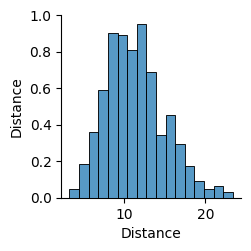

In [ ]:
sns.pairplot(df[['Distance','Transport']]);

## **Checking missing value in data frame**

In [ ]:
df.isnull().sum()

Age          0
Gender       0
Engineer     0
MBA          0
Work Exp     0
Salary       0
Distance     0
license      0
Transport    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        444 non-null    int64  
 1   Gender     444 non-null    object 
 2   Engineer   444 non-null    int64  
 3   MBA        444 non-null    int64  
 4   Work Exp   444 non-null    int64  
 5   Salary     444 non-null    float64
 6   Distance   444 non-null    float64
 7   license    444 non-null    int64  
 8   Transport  444 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 31.3+ KB


so no null values

In [ ]:
df['Age'].skew()

0.9552759761192868

In [ ]:
df['Age'].describe()

count    444.000000
mean      27.747748
std        4.416710
min       18.000000
25%       25.000000
50%       27.000000
75%       30.000000
max       43.000000
Name: Age, dtype: float64

<Axes: ylabel='Age'>

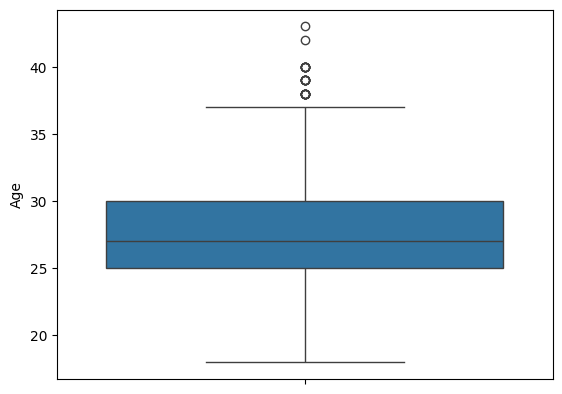

In [ ]:
# Box Plot
import seaborn as sns
sns.boxplot(df['Age'])

Outliers present

In [ ]:
# Check value counts of the 'Engineer' column
value_counts = df['Engineer'].value_counts()
print(value_counts)


Engineer
1    335
0    109
Name: count, dtype: int64


In [ ]:
# Check value counts of the 'Engineer' column
value_counts = df['MBA'].value_counts()
print(value_counts)


MBA
0    332
1    112
Name: count, dtype: int64


In [ ]:
# Check value counts of the 'Engineer' column
value_counts = df['license'].value_counts()
print(value_counts)


license
0    340
1    104
Name: count, dtype: int64


So in above column Outlier treatment is not applicable

In [ ]:
df.shape

(444, 9)

##**Checking and Removal of outliers**

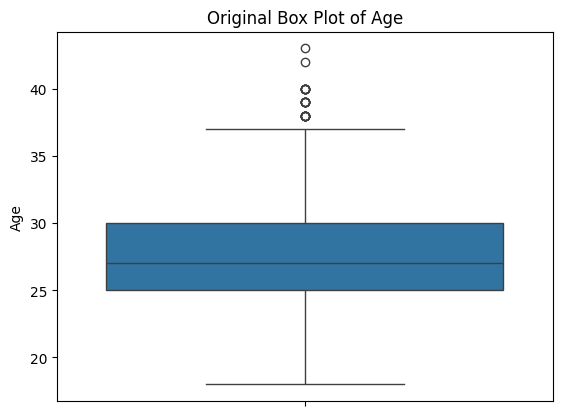

Threshold value for removing outliers in Age : 37.5


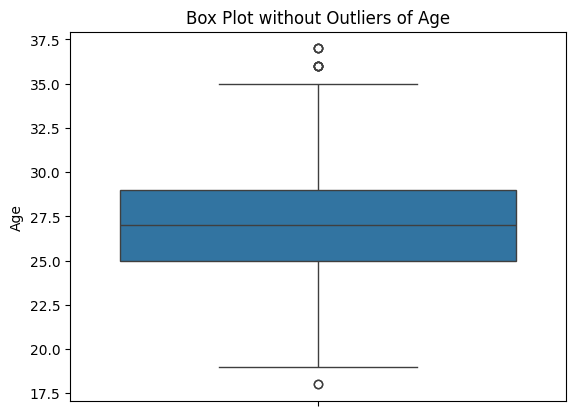

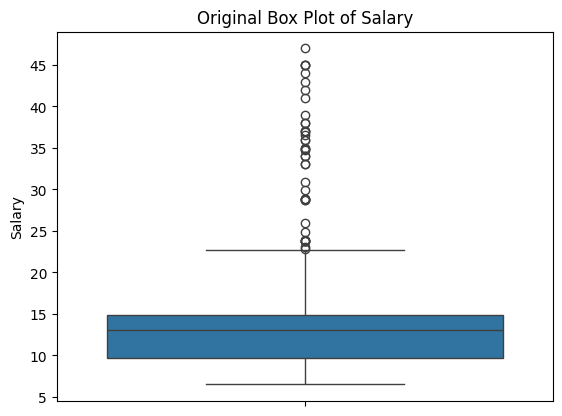

Threshold value for removing outliers in Salary : 22.775000000000002


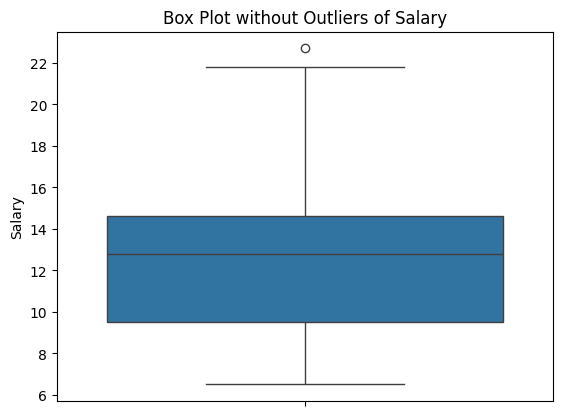

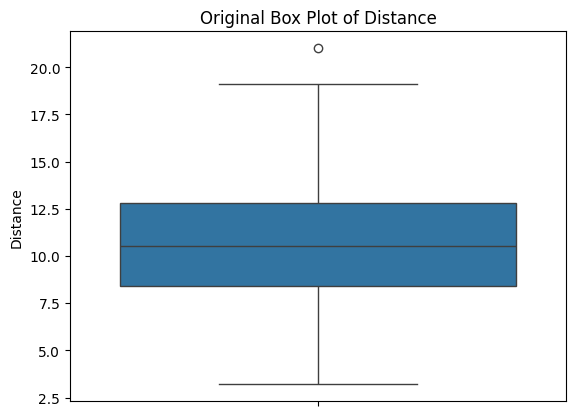

Threshold value for removing outliers in Distance : 19.400000000000002


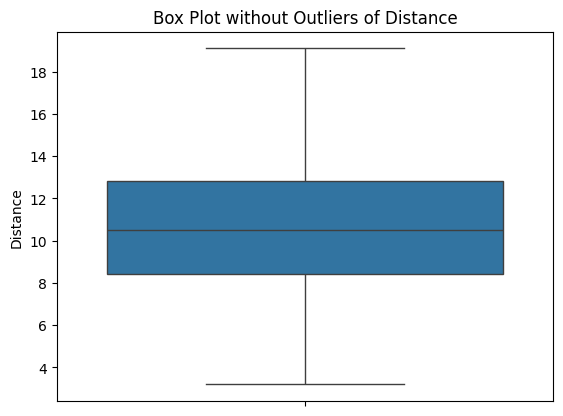

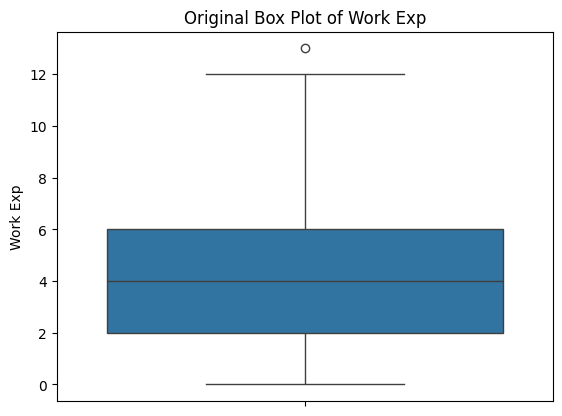

Threshold value for removing outliers in Work Exp : 12.0


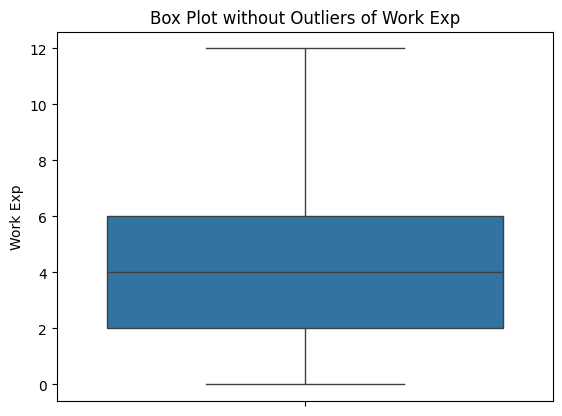

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def removal_box_plot(df, columns):
    for column in columns:
        sns.boxplot(df[column])
        plt.title(f'Original Box Plot of {column}')
        plt.show()

        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        threshold_value = Q3 + 1.5 * IQR  # Adjust multiplier as needed
        print("Threshold value for removing outliers in", column, ":", threshold_value)

        removed_outliers = df[df[column] <= threshold_value]

        sns.boxplot(removed_outliers[column])
        plt.title(f'Box Plot without Outliers of {column}')
        plt.show()

        df = removed_outliers  # Update DataFrame after removing outliers from each column

    return removed_outliers

# Specify the list of columns from which you want to remove outliers
columns_to_remove_outliers = ['Age', 'Salary', 'Distance','Work Exp']

no_outliers = removal_box_plot(df, columns_to_remove_outliers)


In [ ]:
no_outliers.shape

(376, 9)

Basic descriptive statistics after removal of outlier

In [ ]:
no_outliers.describe()

,Age,Engineer,MBA,Work Exp,Salary,Distance,license
count,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000
mean,26.446809,0.742021,0.247340,4.585106,12.318351,10.699734,0.154255
std,2.958800,0.438105,0.432041,2.831855,3.348028,3.127031,0.361675
min,18.000000,0.000000,0.000000,0.000000,6.500000,3.200000,0.000000
25%,24.000000,0.000000,0.000000,2.000000,9.375000,8.400000,0.000000
50%,26.000000,1.000000,0.000000,4.000000,12.750000,10.500000,0.000000
75%,28.000000,1.000000,0.000000,6.000000,14.600000,12.800000,0.000000
max,34.000000,1.000000,1.000000,12.000000,22.700000,19.100000,1.000000


## **Question 2. Split the data into train and test in the ratio 70:30. Is scaling necessary or not?**

In [ ]:
# import modules
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# get the locations
X = df.iloc[:, 0:8].values
y = df.iloc[:, 8].values



In [ ]:
df2 = pd.DataFrame(X)
df2

,0,1,2,3,4,5,6,7
0,28,Male,0,0,4,14.3,3.2,0
1,23,Female,1,0,4,8.3,3.3,0
2,29,Male,1,0,7,13.4,4.1,0
3,28,Female,1,1,5,13.4,4.5,0
4,27,Male,1,0,4,13.4,4.6,0
...,...,...,...,...,...,...,...,...
439,40,Male,1,0,20,57.0,21.4,1
440,38,Male,1,0,19,44.0,21.5,1
441,37,Male,1,0,19,45.0,21.5,1
442,37,Male,0,0,19,47.0,22.8,1


In [ ]:
df4=df2.replace({'Male':1,'Female':0})
df4

NameError: name 'df2' is not defined

In [ ]:
array = df4.values

In [ ]:
X2=array

In [ ]:
X2

array([[28. ,  1. ,  0. , ..., 14.3,  3.2,  0. ],
       [23. ,  0. ,  1. , ...,  8.3,  3.3,  0. ],
       [29. ,  1. ,  1. , ..., 13.4,  4.1,  0. ],
       ...,
       [37. ,  1. ,  1. , ..., 45. , 21.5,  1. ],
       [37. ,  1. ,  0. , ..., 47. , 22.8,  1. ],
       [39. ,  1. ,  1. , ..., 50. , 23.4,  1. ]])

In [ ]:
y

array(['Public Transport', 'Public Transport', 'Public Transport',
       'Public Transport', 'Public Transport', 'Public Transport',
       'Private Transport', 'Public Transport', 'Public Transport',
       'Public Transport', 'Public Transport', 'Public Transport',
       'Public Transport', 'Public Transport', 'Public Transport',
       'Public Transport', 'Public Transport', 'Public Transport',
       'Public Transport', 'Public Transport', 'Public Transport',
       'Private Transport', 'Private Transport', 'Public Transport',
       'Public Transport', 'Public Transport', 'Public Transport',
       'Private Transport', 'Public Transport', 'Public Transport',
       'Public Transport', 'Public Transport', 'Public Transport',
       'Public Transport', 'Public Transport', 'Public Transport',
       'Public Transport', 'Private Transport', 'Public Transport',
       'Public Transport', 'Public Transport', 'Public Transport',
       'Public Transport', 'Public Transport', 'Public Tr

In [ ]:
y2=y
y2

array(['Public Transport', 'Public Transport', 'Public Transport',
       'Public Transport', 'Public Transport', 'Public Transport',
       'Private Transport', 'Public Transport', 'Public Transport',
       'Public Transport', 'Public Transport', 'Public Transport',
       'Public Transport', 'Public Transport', 'Public Transport',
       'Public Transport', 'Public Transport', 'Public Transport',
       'Public Transport', 'Public Transport', 'Public Transport',
       'Private Transport', 'Private Transport', 'Public Transport',
       'Public Transport', 'Public Transport', 'Public Transport',
       'Private Transport', 'Public Transport', 'Public Transport',
       'Public Transport', 'Public Transport', 'Public Transport',
       'Public Transport', 'Public Transport', 'Public Transport',
       'Public Transport', 'Private Transport', 'Public Transport',
       'Public Transport', 'Public Transport', 'Public Transport',
       'Public Transport', 'Public Transport', 'Public Tr

In [ ]:
# Preprocess the dataset and divide into train and test
sc = StandardScaler()
X2 = sc.fit_transform(X2)
le = LabelEncoder()
y2 = le.fit_transform(y2)
X_train, X_test,\
    y_train, y_test = train_test_split(X2, y2,
                                       test_size=0.3)

In [ ]:
X_train

array([[-0.39615892,  0.63644583,  0.57041488, ..., -0.31973909,
        -0.36734218, -0.55306632],
       [ 0.05717758,  0.63644583, -1.75310995, ..., -0.1665128 ,
        -0.42286556,  1.80810143],
       [ 0.05717758, -1.57122564,  0.57041488, ...,  0.52300549,
        -1.11690781, -0.55306632],
       ...,
       [-1.07616368,  0.63644583, -1.75310995, ..., -0.71238145,
        -0.75600584, -0.55306632],
       [ 0.51051408,  0.63644583,  0.57041488, ..., -0.13778287,
         0.18789162, -0.55306632],
       [-0.39615892, -1.57122564, -1.75310995, ..., -0.31973909,
        -0.53391232, -0.55306632]])

In [ ]:
y_train

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,

In [ ]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
	X, y, test_size=0.3, random_state=0)


X: This contains all the rows and all columns except the last one. It is commonly used to represent the features or independent variables in a dataset.

y: This contains all the rows and only the last column. It is commonly used to represent the target variable or the dependent variable in a dataset.

If you don't know which columns are the dependent and independent variables in your dataset, you can still split your data into training and testing sets for machine learning tasks. You can treat the splitting as a way to divide your dataset into portions for training your model and evaluating its performance, without specifically designating independent and dependent variables.



## **Scaling**

In [ ]:
import pandas
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X = df[['Age', 'license', 'Engineer', 'MBA', 'Work Exp', 'Salary', 'Distance']]

scaledX = scale.fit_transform(X)

print(scaledX)

[[ 0.05717758 -0.55306632 -1.75310995 ... -0.45033245 -0.18566609
  -2.2551371 ]
 [-1.07616368 -0.55306632  0.57041488 ... -0.45033245 -0.76026467
  -2.22737541]
 [ 0.28384583 -0.55306632  0.57041488 ...  0.13717276 -0.27185587
  -2.00528189]
 ...
 [ 2.09719183  1.80810143  0.57041488 ...  2.48719361  2.7543633
   2.82525217]
 [ 2.09719183  1.80810143 -1.75310995 ...  2.48719361  2.94589616
   3.18615413]
 [ 2.55052833  1.80810143  0.57041488 ...  2.87886375  3.23319545
   3.35272427]]


Without Scaling

In [ ]:
import pandas
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X = df[['Age', 'license', 'Engineer', 'MBA', 'Work Exp', 'Salary', 'Distance']]


print(X)

     Age  license  Engineer  MBA  Work Exp  Salary  Distance
0     28        0         0    0         4    14.3       3.2
1     23        0         1    0         4     8.3       3.3
2     29        0         1    0         7    13.4       4.1
3     28        0         1    1         5    13.4       4.5
4     27        0         1    0         4    13.4       4.6
..   ...      ...       ...  ...       ...     ...       ...
421   23        0         1    1         2     9.0      17.9
422   23        0         0    0         3     9.9      17.9
431   29        1         0    1         7    15.0      19.0
432   33        0         1    1        10    17.0      19.1
433   26        1         1    0         4    13.0      19.1

[376 rows x 7 columns]


Scaling is a preprocessing step used in machine learning to standardize or normalize the features of a dataset. It helps to bring all features to the same scale, which can be important for certain algorithms that are sensitive to the scale of the input features. Here's what scaling does to the raw data in a DataFrame:

Standardization: Scaling typically involves transforming the data so that it has a mean of 0 and a standard deviation of 1. This is often referred to as standardization or Z-score normalization. Each feature is transformed independently.

Normalization: Alternatively, scaling can involve transforming the data so that it falls within a specific range, such as [0, 1] or [-1, 1]. This is known as normalization or min-max scaling. Again, each feature is transformed independently.

The purpose of scaling is to ensure that features are comparable and have similar ranges of values. This can help improve the performance and stability of machine learning algorithms, particularly those that rely on distance calculations or optimization techniques. Some algorithms, such as support vector machines (SVM) and k-nearest neighbors (KNN), are particularly sensitive to the scale of the input features, so scaling is often recommended when using these algorithms.

In your code example, the StandardScaler from scikit-learn is used to standardize the features in the DataFrame X. This means that each feature will have a mean of 0 and a standard deviation of 1 after scaling. This can be useful for algorithms that assume Gaussian distributions or for algorithms that use regularization, such as linear regression or logistic regression.

In [ ]:
import pandas as pd

# Convert scaledX array to a DataFrame
scaled_df = pd.DataFrame(scaledX, columns=['Age', 'license', 'Engineer', 'MBA', 'Work Exp', 'Salary', 'Distance'])

# Print the DataFrame
print(scaled_df)


          Age   license  Engineer       MBA  Work Exp    Salary  Distance
0    0.525639 -0.427071 -1.695962 -0.573256 -0.206891  0.592674 -2.401552
1   -1.166487 -0.427071  0.589636 -0.573256 -0.206891 -1.201814 -2.369530
2    0.864064 -0.427071  0.589636 -0.573256  0.853897  0.323501 -2.113356
3    0.525639 -0.427071  0.589636  1.744423  0.146705  0.323501 -1.985268
4    0.187214 -0.427071  0.589636 -0.573256 -0.206891  0.323501 -1.953247
..        ...       ...       ...       ...       ...       ...       ...
371 -1.166487 -0.427071  0.589636  1.744423 -0.914083 -0.992457  2.305657
372 -1.166487 -0.427071 -1.695962 -0.573256 -0.560487 -0.723284  2.305657
373  0.864064  2.341529 -1.695962  1.744423  0.853897  0.802031  2.657897
374  2.217765 -0.427071  0.589636  1.744423  1.914684  1.400194  2.689919
375 -0.151211  2.341529  0.589636 -0.573256 -0.206891  0.203868  2.689919

[376 rows x 7 columns]


Build the following models on the 70% training data and check the performance of these models on the Training as well as the 30% Test data using the various inferences from the Confusion Matrix and plotting a AUC-ROC curve along with the AUC values. Tune the models wherever required for optimum performance

##**Question 3. Build the following models on the 70% training data and check the performance of these models on the Training as well as the 30% Test data using the various inferences from the Confusion Matrix and plotting a AUC-ROC curve along with the AUC values. Tune the models wherever required for optimum performance**:
a. Logistic Regression Model

b. Linear Discriminant Analysis

c. Decision Tree Classifier – CART model

d. Naïve Bayes Model

e. KNN Model

f. Random Forest Model

g. Boosting Classifier Model using Gradient boost.

### **a. Logistic Regression Model**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
sc_X =StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
model_SVC = SVC(kernel='rbf', random_state=4)
model_SVC.fit(X_train, y_train_encoded)
y_pred_svm = model_SVC.predict(X_test)


In [ ]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train_encoded)
y_pred_logistic = model_logistic.predict(X_test)


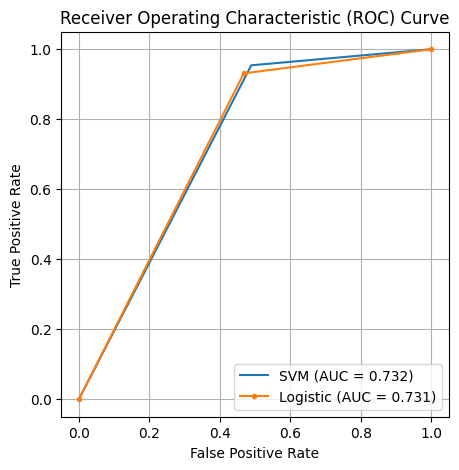

In [ ]:
from sklearn.metrics import roc_curve, auc

threshold = 0.5

# Convert y_test to binary class labels
y_test_binary = (y_test.astype(float) > threshold).astype(int)

# Compute ROC curve and AUC for logistic regression
logistic_fpr, logistic_tpr, _ = roc_curve(y_test_binary, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

# Compute ROC curve and AUC for SVM
svm_fpr, svm_tpr, _ = roc_curve(y_test_binary, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

# Plot ROC curves
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (AUC = %0.3f)' % auc_svm)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (AUC = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()


Readings and Interpretations from above graph.
Axes:
X-axis: "False Positive Rate" (FPR), which measures the proportion of actual negatives that are incorrectly identified as positives.
Y-axis: "True Positive Rate" (TPR), also known as recall or sensitivity, which measures the proportion of actual positives that are correctly identified.
Curves:
Blue Curve: Represents the performance of the Support Vector Machine (SVM) classifier.
AUC (Area Under the Curve) = 0.732: This is a single scalar value summarizing the overall performance of the classifier. An AUC of 0.732 indicates that the model has a fair performance.
Orange Curve: Represents the performance of the Logistic Regression classifier.
AUC = 0.731: Similarly, this indicates that the logistic regression model also has a fair performance, slightly lower than the SVM but very close.
Observations:
Both curves start at the point (0,0) and end at the point (1,1), which is typical for ROC curves.
The two curves are very close to each other, indicating that both models perform similarly in terms of distinguishing between the positive and negative classes.
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test. Here, the curves show moderate accuracy.
Insights:
Comparative Performance: The SVM slightly outperforms the Logistic Regression model based on the AUC values, but the difference is minimal.
Model Choice: Given the very close performance metrics, other factors such as computational efficiency, interpretability, and the specific context of the application might influence the choice between SVM and Logistic Regression.

### **b. Linear Discriminant Analysis**

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
n_classes = len(set(y2))

# The maximum number of components
max_components = min(X2.shape[1], n_classes - 1)

# Ensure n_components is set correctly
n_components = min(2, max_components)

lda = LinearDiscriminantAnalysis(n_components=n_components)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

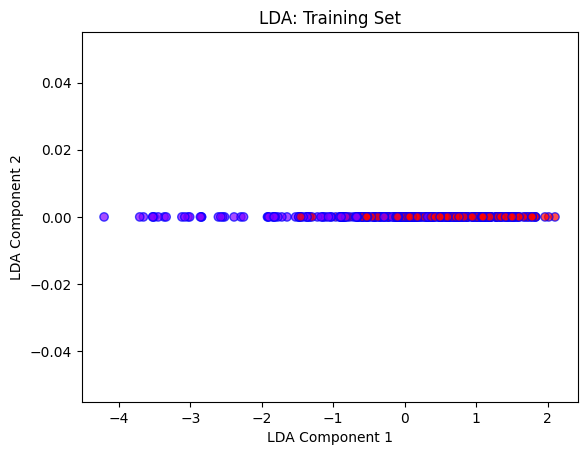

In [ ]:
# Plot the transformed training data
plt.scatter(
    X_train_lda[:, 0],  # First LDA component
    X_train_lda[:, 1] if X_train_lda.shape[1] > 1 else [0]*len(X_train_lda),  # Second LDA component, or zero if only one component
    c=y_train,          # Class labels for coloring the points
    cmap='rainbow',     # Colormap
    alpha=0.7,          # Transparency level
    edgecolors='b'      # Edge color of the points
)
plt.xlabel('LDA Component 1')  # Label for x-axis
plt.ylabel('LDA Component 2')  # Label for y-axis
plt.title('LDA: Training Set') # Title of the plot
plt.show()                     # Display the plot

In [ ]:
# classify using random forest classifier
classifier = RandomForestClassifier(max_depth=2,
                                    random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


In [ ]:

# print the accuracy and confusion matrix
print('Accuracy : ' + str(accuracy_score(y_test, y_pred)))
conf_m = confusion_matrix(y_test, y_pred)
print(conf_m)

Accuracy : 0.7611940298507462
[[17 30]
 [ 2 85]]


###**c. Decision Tree Classifier – CART model**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
len(df)

444

In [ ]:
df.shape

(444, 9)

In [ ]:
df.head()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,28,Male,0,0,4,14.3,3.2,0,Public Transport
1,23,Female,1,0,4,8.3,3.3,0,Public Transport
2,29,Male,1,0,7,13.4,4.1,0,Public Transport
3,28,Female,1,1,5,13.4,4.5,0,Public Transport
4,27,Male,1,0,4,13.4,4.6,0,Public Transport


In [ ]:
 # Creating the classifier object
 def train_using_gini(X_train, X_test, y_train):
    clf_gini = DecisionTreeClassifier(criterion="gini",
                                      random_state=100, max_depth=3, min_samples_leaf=5)

    # Performing training
    clf_gini.fit(X_train, y_train)

In [ ]:
def train_using_entropy(X_train, X_test, y_train):

    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
        criterion="entropy", random_state=100,
        max_depth=3, min_samples_leaf=5)

    # Performing training
    clf_entropy.fit(X_train, y_train)

In [ ]:
def prediction(X_test, clf_object):
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred

# Placeholder function for cal_accuracy
def cal_accuracy(y_test, y_pred):
    print("Confusion Matrix: ",
          confusion_matrix(y_test, y_pred))
    print("Accuracy : ",
          accuracy_score(y_test, y_pred)*100)
    print("Report : ",
          classification_report(y_test, y_pred))

In [ ]:
# Function to plot the decision tree
def plot_decision_tree(clf_object, feature_names, class_names):
    plt.figure(figsize=(15, 10))
    plot_tree(clf_object, filled=True, feature_names=feature_names, class_names=class_names, rounded=True)
    plt.show()

In [ ]:
clf_gini = train_using_gini(X_train, X_test, y_train)
clf_entropy = train_using_entropy(X_train, X_test, y_train)

In [ ]:
# Ensure that the train_using_entropy function is defined and returns a trained decision tree classifier.
def train_using_entropy(X_train, X_test, y_train):
    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
        criterion="entropy", random_state=100,
        max_depth=3, min_samples_leaf=5)

    # Performing training
    clf_entropy.fit(X_train, y_train)

    return clf_entropy

# Train the decision trees
clf_gini = train_using_gini(X_train, X_test, y_train)
clf_entropy = train_using_entropy(X_train, X_test, y_train)


In [ ]:
# Ensure that the train_using_gini function is defined and returns a trained decision tree classifier.
def train_using_gini(X_train, X_test, y_train):
    # Decision tree with gini
    clf_gini = DecisionTreeClassifier(criterion="gini", random_state=100,
        max_depth=3, min_samples_leaf=5)

    # Performing training
    clf_gini.fit(X_train, y_train)

    return clf_gini

# Ensure that the train_using_entropy function is defined and returns a trained decision tree classifier.
def train_using_entropy(X_train, X_test, y_train):
    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
        criterion="entropy", random_state=100,
        max_depth=3, min_samples_leaf=5)

    # Performing training
    clf_entropy.fit(X_train, y_train)

    return clf_entropy

# Train the decision trees
clf_gini = train_using_gini(X_train, X_test, y_train)
clf_entropy = train_using_entropy(X_train, X_test, y_train)

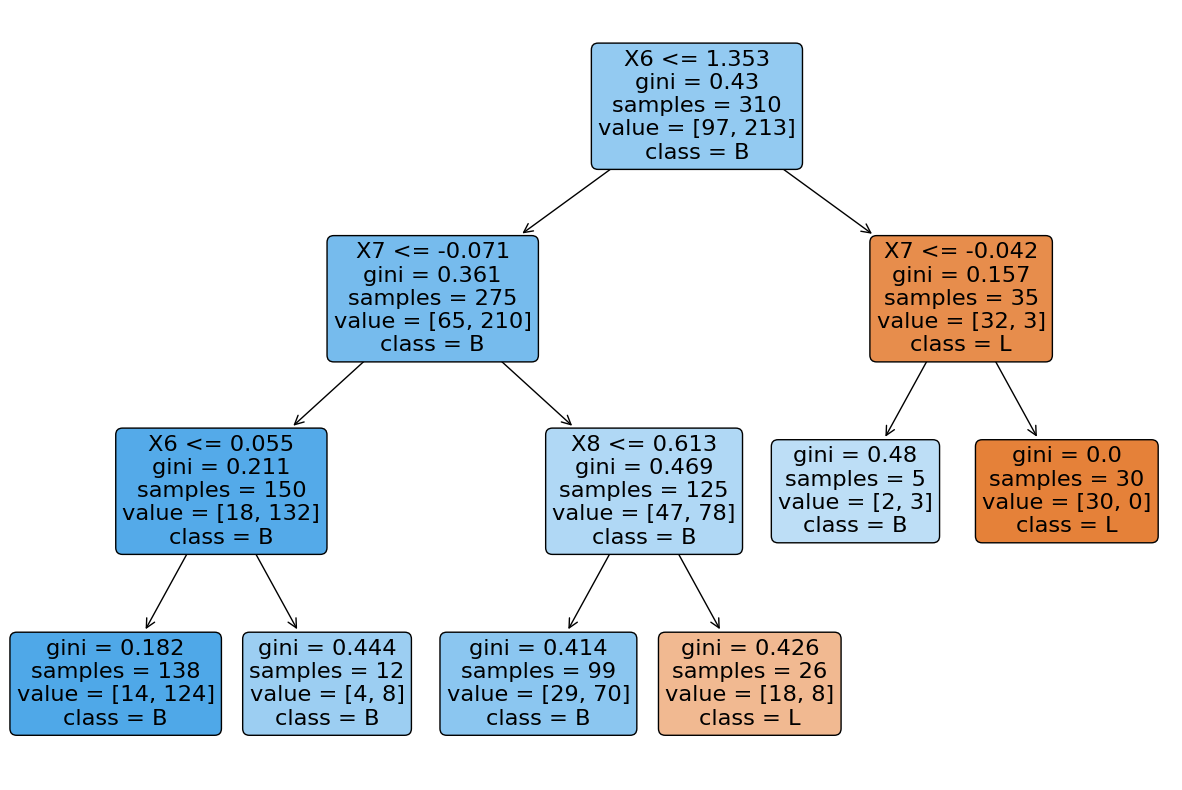

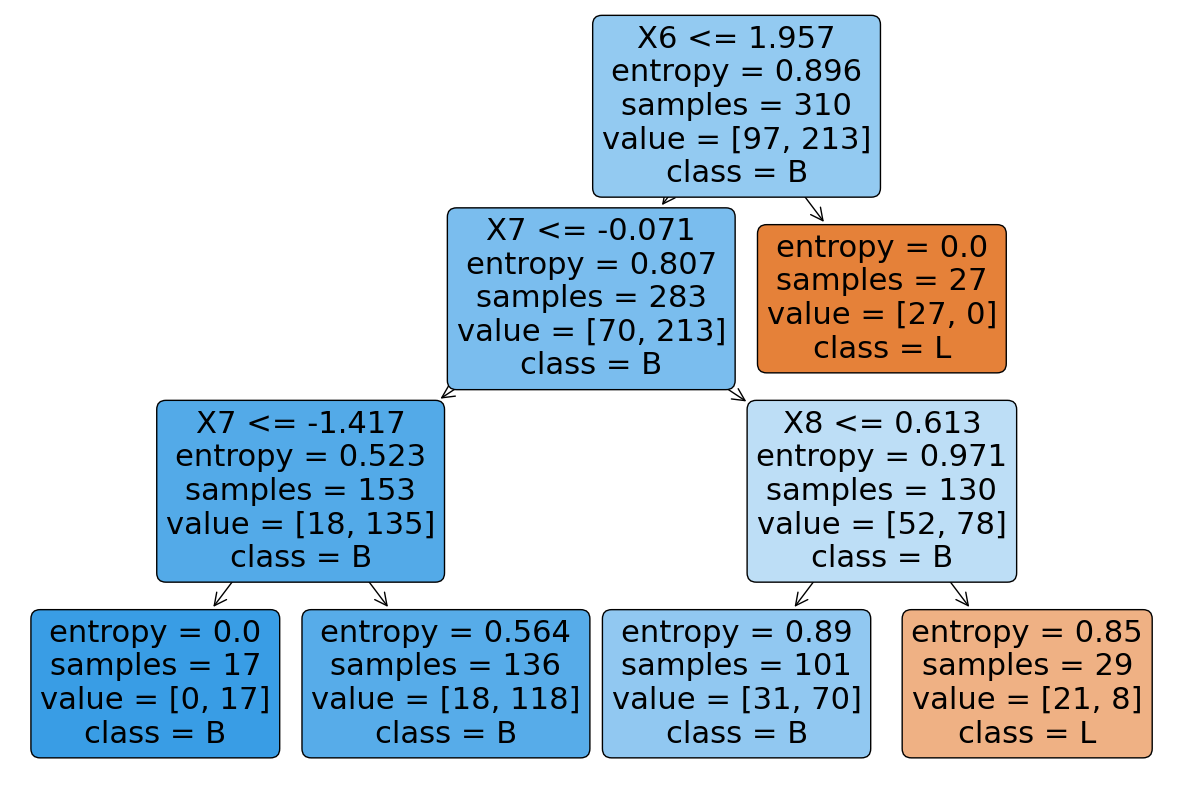

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

def is_decision_tree_classifier(clf):
    return isinstance(clf, DecisionTreeClassifier)

if is_decision_tree_classifier(clf_gini) and is_decision_tree_classifier(clf_entropy):
    # Plot the decision trees
    plot_decision_tree(clf_gini, ['X1', 'X2', 'X3', 'X4','X5','X6','X7','X8'], ['L', 'B'])
    plot_decision_tree(clf_entropy, ['X1', 'X2', 'X3','X4','X5','X6','X7','X8'], ['L', 'B'])
else:
    raise TypeError("clf_gini and clf_entropy must be valid decision tree classifiers.")

In [ ]:
# Operational Phase
print("Results Using Gini Index:")
y_pred_gini = prediction(X_test, clf_gini)
cal_accuracy(y_test, y_pred_gini)

Results Using Gini Index:
Predicted values:
[1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0
 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0]
Confusion Matrix:  [[19 28]
 [ 3 84]]
Accuracy :  76.86567164179104
Report :                precision    recall  f1-score   support

           0       0.86      0.40      0.55        47
           1       0.75      0.97      0.84        87

    accuracy                           0.77       134
   macro avg       0.81      0.68      0.70       134
weighted avg       0.79      0.77      0.74       134



In [ ]:
print("Results Using Entropy:")
y_pred_entropy = prediction(X_test, clf_entropy)
cal_accuracy(y_test, y_pred_entropy)

Results Using Entropy:
Predicted values:
[1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0
 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0]
Confusion Matrix:  [[20 27]
 [ 2 85]]
Accuracy :  78.35820895522389
Report :                precision    recall  f1-score   support

           0       0.91      0.43      0.58        47
           1       0.76      0.98      0.85        87

    accuracy                           0.78       134
   macro avg       0.83      0.70      0.72       134
weighted avg       0.81      0.78      0.76       134



### **d. Naïve Bayes Model**

In [ ]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
y_pred

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[23, 24],
       [ 4, 83]])

### **e. KNN Model**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)

# Predict on dataset which model has not seen before
print(knn.predict(X_test))

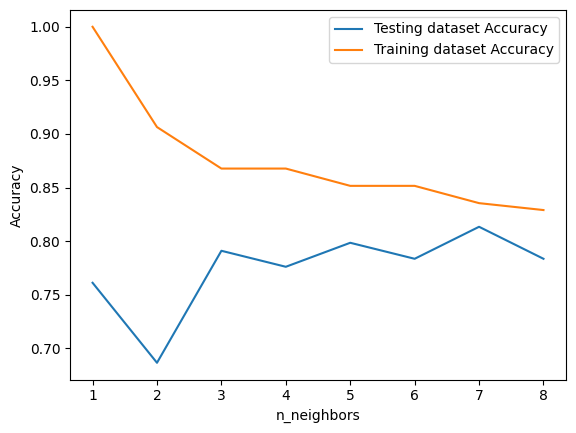

In [ ]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

### **f. Random Forest Model**

In [ ]:
import sklearn
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

warnings.filterwarnings('ignore')

In [ ]:
X20= df.iloc[:,0:1].values  #features
y20 = df.iloc[:,8].values  # Target variable

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder


# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)
df10 = pd.DataFrame(y)
df10
df4=df10.replace({'Public Transport':1,'Private Transport':0})
df4
y=df4
y
array=df4.values
y=array
y
# Fit the regressor with x and y data
regressor.fit(X20, y)

RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)

In [ ]:
# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score

# Access the OOB Score
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

# Making predictions on the same data or new data
predictions = regressor.predict(X20)

# Evaluating the model
mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')

Out-of-Bag Score: 0.1197042618972235
Mean Squared Error: 0.16571430628764458
R-squared: 0.24379038230738215


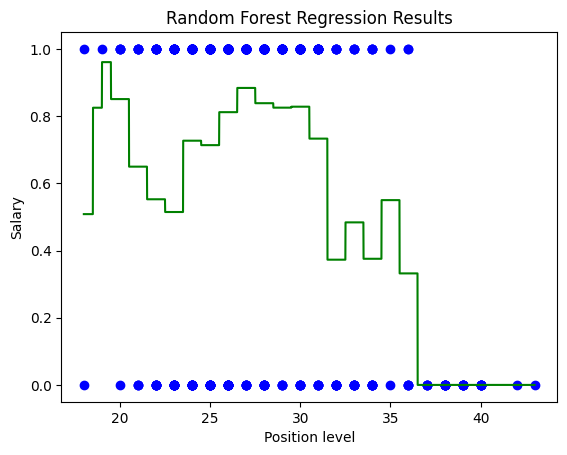

In [ ]:
import numpy as np

X20_grid = np.arange(min(X20),max(X20),0.01)
X20_grid = X20_grid.reshape(len(X20_grid),1)

plt.scatter(X20,y, color='blue') #plotting real points
plt.plot(X20_grid, regressor.predict(X20_grid),color='green') #plotting for predict points

plt.title("Random Forest Regression Results")
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

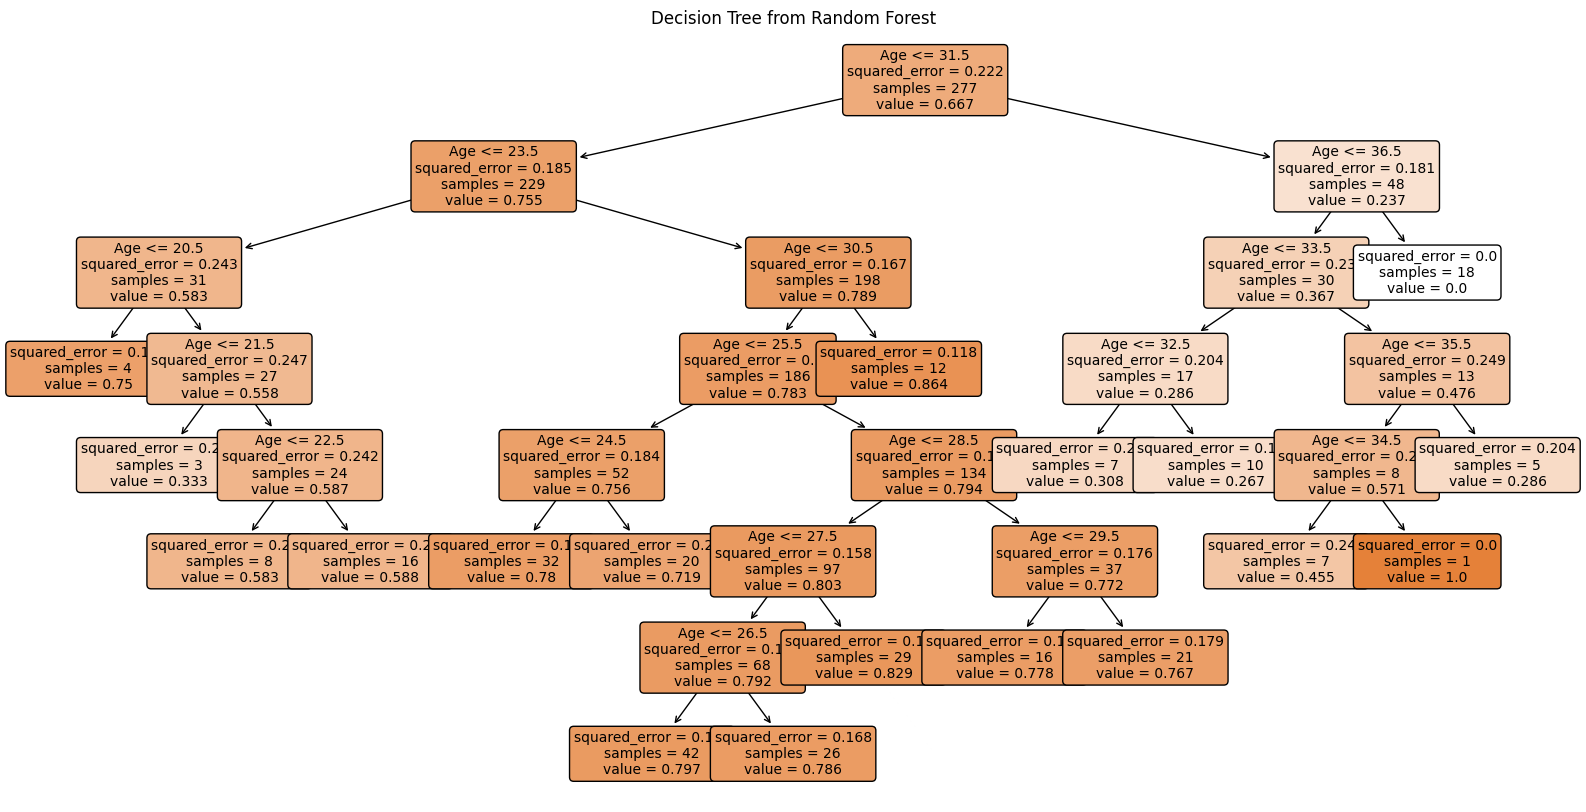

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

tree_to_plot = regressor.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=df.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()

### **g. Boosting Classifier Model using Gradient boost**

In [ ]:
# Import models and utility functions
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Setting SEED for reproducibility
SEED = 23



# Instantiate Gradient Boosting Regressor
gbc = GradientBoostingClassifier(n_estimators=300,
								learning_rate=0.05,
								random_state=100,
								max_features=5 )
# Fit to training set
gbc.fit(X_train, y_train)

# Predict on test set
pred_y = gbc.predict(X_test)

# accuracy
acc = accuracy_score(y_test, pred_y)
print("Gradient Boosting Classifier accuracy is : {:.2f}".format(acc))


Gradient Boosting Classifier accuracy is : 0.81


In [ ]:
# Import the necessary libraries
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Setting SEED for reproducibility
SEED = 23


# Instantiate Gradient Boosting Regressor
gbr = GradientBoostingRegressor(loss='absolute_error',
                                learning_rate=0.1,
                                n_estimators=300,
                                max_depth = 1,
                                random_state = SEED,
                                max_features = 5)

# Fit to training set
gbr.fit(X_train, y_train)

# Predict on test set
pred_y2 = gbr.predict(X_test)

# test set RMSE
test_rmse = mean_squared_error(y_test, pred_y2) ** (1 / 2)

# Print rmse
print('Root mean Square error: {:.2f}'.format(test_rmse))

Root mean Square error: 0.59


# **Part 2: Text Mining**

**Theory**

A dataset of Shark Tank episodes is made available. It contains 495 entrepreneurs making their pitch to the VC sharks

Mounting drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Store the csv file path in a variable
path2 = "/content/drive/My Drive/SharkTankCompanies.csv"

In [ ]:
tt=pd.read_csv(path2)

In [ ]:
print(tt)

      deal                                        description  episode  \
0    False             Bluetooth device implant for your ear.        1   
1     True  Retail and wholesale pie factory with two reta...        1   
2     True  Ava the Elephant is a godsend for frazzled par...        1   
3    False  Organizing, packing, and moving services deliv...        1   
4    False  Interactive media centers for healthcare waiti...        1   
..     ...                                                ...      ...   
490   True  Zoom Interiors is a virtual service for interi...       28   
491   True  Spikeball started out as a casual outdoors gam...       29   
492   True  Shark Wheel is out to literally reinvent the w...       29   
493  False  Adriana Montano wants to open the first Cat Ca...       29   
494   True  Sway Motorsports makes a three-wheeled, all-el...       29   

                category                                      entrepreneurs  \
0              Novelties        

In [ ]:
tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   deal                    495 non-null    bool  
 1   description             495 non-null    object
 2   episode                 495 non-null    int64 
 3   category                495 non-null    object
 4   entrepreneurs           423 non-null    object
 5   location                495 non-null    object
 6   website                 457 non-null    object
 7   askedFor                495 non-null    int64 
 8   exchangeForStake        495 non-null    int64 
 9   valuation               495 non-null    int64 
 10  season                  495 non-null    int64 
 11  shark1                  495 non-null    object
 12  shark2                  495 non-null    object
 13  shark3                  495 non-null    object
 14  shark4                  495 non-null    object
 15  shark5

In [ ]:
tt.describe()

,episode,askedFor,exchangeForStake,valuation,season
count,495.000000,4.950000e+02,495.000000,4.950000e+02,495.000000
mean,12.125253,2.584909e+05,17.539394,2.165615e+06,4.048485
std,7.918133,4.615999e+05,10.061047,3.761971e+06,1.658518
min,1.000000,1.000000e+04,3.000000,4.000000e+04,1.000000
25%,5.000000,7.500000e+04,10.000000,4.400000e+05,3.000000
50%,11.000000,1.500000e+05,15.000000,1.000000e+06,4.000000
75%,18.000000,2.500000e+05,20.000000,2.000000e+06,5.000000
max,29.000000,5.000000e+06,100.000000,3.000000e+07,6.000000


## **1. Pick out the Deal (Dependent Variable) and Description columns into a separate data frame.**

Making a new data frame as D2 from choosing specific columns from the data frame tt as asked in the question

In [ ]:
D2=tt[['deal','description']]

In [ ]:
D2

,deal,description
0,False,Bluetooth device implant for your ear.
1,True,Retail and wholesale pie factory with two reta...
2,True,Ava the Elephant is a godsend for frazzled par...
3,False,"Organizing, packing, and moving services deliv..."
4,False,Interactive media centers for healthcare waiti...
...,...,...
490,True,Zoom Interiors is a virtual service for interi...
491,True,Spikeball started out as a casual outdoors gam...
492,True,Shark Wheel is out to literally reinvent the w...
493,False,Adriana Montano wants to open the first Cat Ca...


## **2. Create two corpora, one with those who secured a Deal, the other with those who did not secure a deal.**

In [ ]:
#converting deal column variables to string type
D2['deal']=D2['deal'].astype(str)

In [ ]:
#makeing seperate df and doing grouping of thoses who secured a Deal
grouped = D2.groupby(D2.deal)
D2_secured_deal = grouped.get_group("True")
D2_secured_deal

,deal,description
1,True,Retail and wholesale pie factory with two reta...
2,True,Ava the Elephant is a godsend for frazzled par...
5,True,One of the first entrepreneurs to pitch on Sha...
9,True,An educational record label and publishing hou...
10,True,A battery-operated cooking device that siphons...
...,...,...
489,True,SynDaver Labs makes synthetic body parts for u...
490,True,Zoom Interiors is a virtual service for interi...
491,True,Spikeball started out as a casual outdoors gam...
492,True,Shark Wheel is out to literally reinvent the w...


In [ ]:
#removing deal column as description column is required for furthere processes
D2_secured_deal_des=D2_secured_deal.drop(['deal'], axis=1)
D2_secured_deal_des

,description
1,Retail and wholesale pie factory with two reta...
2,Ava the Elephant is a godsend for frazzled par...
5,One of the first entrepreneurs to pitch on Sha...
9,An educational record label and publishing hou...
10,A battery-operated cooking device that siphons...
...,...
489,SynDaver Labs makes synthetic body parts for u...
490,Zoom Interiors is a virtual service for interi...
491,Spikeball started out as a casual outdoors gam...
492,Shark Wheel is out to literally reinvent the w...


In [ ]:
#converting df to corpus
corpus1 = D2_secured_deal['description'].tolist()
corpus1

['Retail and wholesale pie factory with two retail locations in New Jersey.',
 'Ava the Elephant is a godsend for frazzled parents of young children everywhere. talking medicine dispenser it easy to administer medicine to little ones by turning the experience more playful and by providing positive reinforcement.',
 'One of the first entrepreneurs to pitch on Shark Tank, Susan Knapp presented A Perfect Pear, her line of pear-focused gourmet food products. Sold across 650 retail stores, the Perfect Pear product portfolio includes jams, jellies, spreads, tapenades, vinegars, marinades, dressings and many others, all designed to showcase the flavors and health benefits of pears.',
 'An educational record label and publishing house designed to get students into learning about classic works of literature.',
 'A battery-operated cooking device that siphons juice, has a silicone basting brush and an injector tip for marinades.',
 'A line of books written to help children find inner calm.',
 "C

In [ ]:
#making a seperate df for not secured deal
grouped2 = D2.groupby(D2.deal)
D2_not_secured_deal = grouped2.get_group("False")
D2_not_secured_deal

,deal,description
0,False,Bluetooth device implant for your ear.
3,False,"Organizing, packing, and moving services deliv..."
4,False,Interactive media centers for healthcare waiti...
6,False,A mixed martial arts clothing line looking to ...
7,False,"Attach Noted is a detachable ""arm"" that holds ..."
...,...,...
482,False,Buck Mason makes high-quality men's clothing i...
484,False,"Frameri answers the question, ""Why aren't your..."
485,False,The Paleo Diet Bar is a nutrition bar that is ...
488,False,Sunscreen Mist adds another point of access fo...


In [ ]:
#droping deal column from not secured deal
D2_not_secured_deal_des=D2_not_secured_deal.drop(['deal'], axis=1)
D2_not_secured_deal_des

,description
0,Bluetooth device implant for your ear.
3,"Organizing, packing, and moving services deliv..."
4,Interactive media centers for healthcare waiti...
6,A mixed martial arts clothing line looking to ...
7,"Attach Noted is a detachable ""arm"" that holds ..."
...,...
482,Buck Mason makes high-quality men's clothing i...
484,"Frameri answers the question, ""Why aren't your..."
485,The Paleo Diet Bar is a nutrition bar that is ...
488,Sunscreen Mist adds another point of access fo...


In [ ]:
#corpus2 = D2_not_secured_deal['description'].tolist()
#corpus2

['Bluetooth device implant for your ear.',
 'Organizing, packing, and moving services delivered by college women.',
 'Interactive media centers for healthcare waiting rooms offering patients web access and educational information.',
 'A mixed martial arts clothing line looking to become the next big brand of active sports / streetwear apparel.',
 'Attach Noted is a detachable "arm" that holds Post-It notes on the side of a laptop screen.',
 'A safety device for seatbelts. It prevents the driver from starting the vehicle unless the seatbelt is buckled.',
 'Household items with a twist: made from recycled chopsticks.',
 'Guitars with a folding neck, designed to fit into a backpack or an overhead compartment on an airplane.',
 "50 State Capitals in 50 Fun Minutes is the most efficient and entertaining method to learn about US geography. This set of flash cards combines phonetics, cartoons, and associations to keep kids' interest and drive long-term learning and retention. Author Ken Bradf

## **3. The following exercise is to be done for both the corpora:**

### **a) Find the number of characters for both the corpuses.**

Number of character for D2_secured_deal_des -

In [ ]:
 D2_secured_deal_des2= D2_secured_deal_des.applymap(lambda x: len(str(x)))

# Print the DataFrame showing the number of characters in each cell
print(D2_secured_deal_des2)
D2_secured_deal_des2.sum()

     description
1             73
2            244
5            365
9            122
10           117
..           ...
489          442
490          328
491          504
492          502
494          508

[251 rows x 1 columns]


description    64060
dtype: int64

Number of character for D2_not_secured_deal

In [ ]:
 D2_not_secured_deal_des2= D2_not_secured_deal_des.applymap(lambda x: len(str(x)))

# Print the DataFrame showing the number of characters in each cell
print(D2_not_secured_deal_des2)
D2_not_secured_deal_des2.sum()

     description
0             38
3             68
4            112
6            110
7             91
..           ...
482           56
484          397
485          258
488          423
493          426

[244 rows x 1 columns]


description    47184
dtype: int64

### **b) Remove Stop Words from the corpora. (Words like ‘also’, ‘made’, ‘makes’, ‘like’, ‘this’, ‘even’ and ‘company’ are to be removed)**

Removal of stop words from D2_secured_deal

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords corpus
nltk.download('stopwords')

# Get NLTK English stopwords
stop_words_nltk = set(stopwords.words('english'))

# Define custom stop words
custom_stopwords = set(['also', 'made', 'makes', 'like', 'this', 'even', 'company'])

# Combine custom and NLTK stop words
all_stopwords = custom_stopwords.union(stop_words_nltk)

# Function to remove stop words from a description
def remove_stopwords(description):
    return ' '.join([word for word in description.split() if word.lower() not in all_stopwords])



# Remove stop words from the 'description' column
D2_secured_deal['description'] = D2_secured_deal['description'].apply(remove_stopwords)

# Print the first few rows of the updated DataFrame
print(D2_secured_deal.head())


    deal                                        description
1   True  Retail wholesale pie factory two retail locati...
2   True  Ava Elephant godsend frazzled parents young ch...
5   True  One first entrepreneurs pitch Shark Tank, Susa...
9   True  educational record label publishing house desi...
10  True  battery-operated cooking device siphons juice,...


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Removing stop words from D2_not_secured_deal

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords corpus
nltk.download('stopwords')

# Get NLTK English stopwords
stop_words_nltk = set(stopwords.words('english'))

# Define custom stop words
custom_stopwords = set(['also', 'made', 'makes', 'like', 'this', 'even', 'company'])

# Combine custom and NLTK stop words
all_stopwords = custom_stopwords.union(stop_words_nltk)

# Function to remove stop words from a description
def remove_stopwords(description):
    return ' '.join([word for word in description.split() if word.lower() not in all_stopwords])

# Remove stop words from the 'description' column
D2_not_secured_deal['description'] = D2_not_secured_deal['description'].apply(remove_stopwords)

# Print the first few rows of the updated DataFrame
print(D2_not_secured_deal.head())


    deal                                        description
0  False                      Bluetooth device implant ear.
3  False  Organizing, packing, moving services delivered...
4  False  Interactive media centers healthcare waiting r...
6  False  mixed martial arts clothing line looking becom...
7  False  Attach Noted detachable "arm" holds Post-It no...


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### **c) What were the top 3 most frequently occurring words in both corpuses (after removing stop words)?**

In [ ]:
from collections import Counter
# Combine all text from the column into a single string
text = ' '.join(D2_secured_deal['description'])

# Tokenize the string into words
words = text.split()

# Count the frequency of each word
word_counts = Counter(words)

# Find the three most frequent words
top_3_words = word_counts.most_common(3)

# Print the results
print("Top 3 most frequent words in the column:")
for word, frequency in top_3_words:
    print(f"{word}: {frequency}")

Top 3 most frequent words in the column:
make: 25
easy: 18
designed: 18


In [ ]:
import pandas as pd
from collections import Counter
# Combine all text from the column into a single string
text = ' '.join(D2_not_secured_deal['description'])

# Tokenize the string into words
words = text.split()

# Count the frequency of each word
word_counts = Counter(words)

# Find the three most frequent words
top_3_words = word_counts.most_common(3)

# Print the results
print("Top 3 most frequent words in the column:")
for word, frequency in top_3_words:
    print(f"{word}: {frequency}")

Top 3 most frequent words in the column:
make: 18
designed: 14
use: 14


### **d) Plot the Word Cloud for both the corpora.**

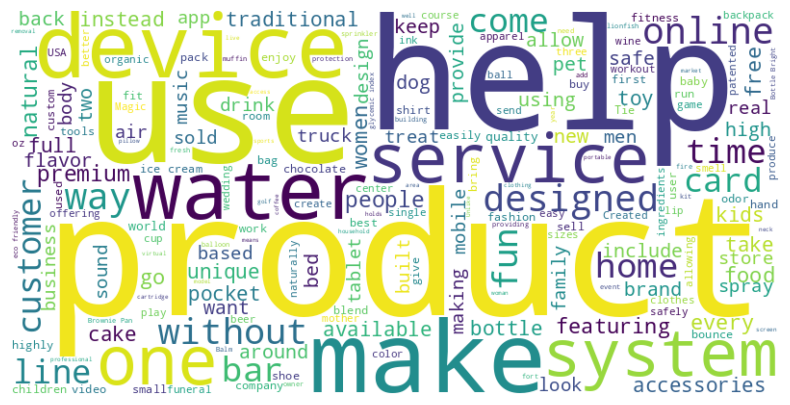

In [ ]:
#pip install wordcloud matplotlib
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Combine all text from the column into a single string
text = ' '.join(D2_not_secured_deal['description'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', stopwords=None).generate(text)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axis
plt.show()


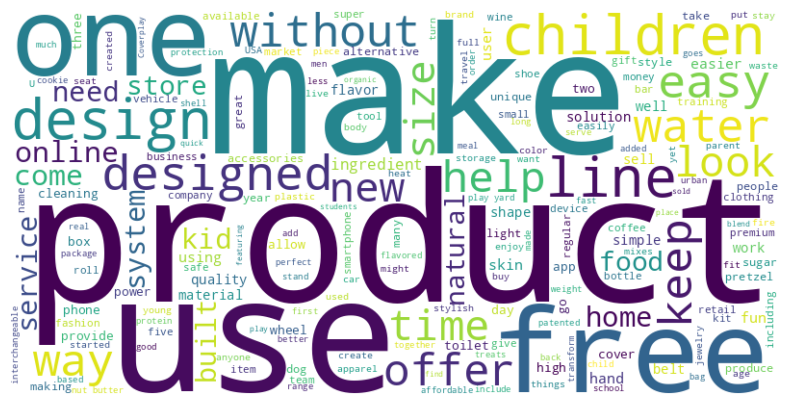

In [ ]:
#pip install wordcloud matplotlib
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Combine all text from the column into a single string
text = ' '.join(D2_secured_deal['description'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', stopwords=None).generate(text)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axis
plt.show()

## **4. Refer to both the word clouds. What do you infer?**

The word cloud visualizes the frequency and prominence of various terms related to products, services, and usage. Here are some inferences from the word cloud:

Product and Device: These terms are central, suggesting a strong focus on tangible goods.
Service: Indicates a significant emphasis on services alongside products.
Use and Help: Highlight the importance of functionality and assistance.
Key Attributes and Features:
Customer: Emphasizes customer-oriented approaches.
Online: Indicates the presence of digital or e-commerce aspects.
Home and Safe: Points to products designed for personal or home use with safety considerations.
Unique, Custom, Different Sizes: Emphasizes variety and personalization.
Natural, Organic: Indicates a trend towards natural or eco-friendly products.
Diverse Product Categories:
Fashion, Apparel, Accessories: Indicates a range of clothing and related products.
Pet, Kids: Specific product lines catering to pets and children.
Technology: References to Mobile, App, Sound highlight tech products.
Functional and Lifestyle Integration:


Inference for secured deal word cloud

Product: Indicates a strong emphasis on tangible goods.
Make and Use: Highlight the importance of creating and utilizing products.
Design and Designed: Suggest a focus on the design aspect, which is crucial in ML for user experience and functionality.
User and Application Focus:
Children and Kid: Indicates products or services tailored for younger demographics.
Home and Helpline: Points to applications that assist in home settings or provide support services.
Attributes and Features:Water and Natural: Highlight the relevance of eco-friendly or essential products.
Size, Shape, Material: Emphasize the customization and physical attributes of products, which can be optimized using ML.
Service and Functionality:
Service and Offer: Reflect the importance of providing services alongside products.
Free and Easy: Indicate a focus on accessibility and ease of use, which are key factors in ML-driven solutions.
Customization and Personalization:
One and Without: Suggest individualized or simplified solutions.
New and Unique: Highlight innovation and novelty in product offerings.
Convenience and Efficiency:
Time and Keep: Stress the importance of time-saving and maintenance aspects.
Easy and Simple: Indicate a user-friendly approach, which is often achieved through intuitive ML algorithms.
Variety and Range:
Food, Book, Toy: Suggest a diverse range of product categories.
Store, Online, Retail: Point to various distribution channels, with a potential focus on e-commerce.
In the context of ML, the word cloud suggests a diverse range of user-centric, functional, and customizable products and services. It emphasizes the importance of design, ease of use, and accessibility, which are critical for effective ML applications. The presence of terms related to children, home, and eco-friendly attributes highlights specific areas where ML can make significant contributions.








##**5.Looking at the word clouds, is it true that the entrepreneurs who introduced devices are less likely to secure a deal based on your analysis?**

As from the word cloud it is clearly visible that the word 'device' was not easily found in secured a deal while it is easily get spotted in other word cloud. This indicates that the word device occured frequently when a deal was rejected.which means that the statement given in the question is true that the entrepreneurs who introduced devices are less likely to secure a deal